<a href="https://colab.research.google.com/github/LIONPANJSHIR/ML/blob/main/Telco_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
# from IPython.display import HTML

# HTML('''
# <style>
#   .code_cell .input {display:none;}
# </style>
# ''')


## Analyse du Churn des Clients Telco – Projet Portfolio

Bonjour, je m'appelle **Ly Amadou**, étudiant en 3ᵉ année à l'Université de Rennes 2.

Ce notebook fait partie de mon portfolio personnel, dans lequel je documente mes projets d'analyse de données et de data science. Aujourd'hui, je vous présente le travail que j'ai réalisé sur l'analyse du churn des clients d'une entreprise de télécommunications (Telco).

Ce projet a pour objectif d’analyser les données clients de l’entreprise Telco afin de **comprendre les facteurs qui influencent la résiliation (churn)** et de proposer des stratégies pour réduire le taux de départ des clients.

La base de données contient **7043 clients** et **21 variables**, représentant à la fois des caractéristiques démographiques, des services souscrits et des informations sur les contrats et la facturation.

---

## 1. Problématique

Le **churn**, ou résiliation de contrat, est un enjeu majeur pour les entreprises de télécommunications : acquérir un nouveau client coûte généralement beaucoup plus cher que de fidéliser un client existant.

Comprendre **pourquoi certains clients résilient** permet de :

* Identifier les clients à risque.
* Développer des stratégies ciblées de rétention.
* Optimiser les actions marketing et le support client.

L’objectif final est de **réduire le taux de churn** et de maximiser la valeur client sur le long terme.

---

## 2. Objectifs de l’analyse

Pour atteindre cet objectif, le projet sera structuré en plusieurs étapes :

### A. Analyse exploratoire des données (EDA)

* Comprendre la structure et la qualité des données.
* Identifier les valeurs manquantes et les types de variables.
* Visualiser les distributions et relations entre variables, notamment avec la variable cible `Churn`.

### B. Prétraitement et Feature Engineering

* Créer des variables dérivées pour mieux capturer le comportement des clients (par exemple, durée d’engagement, combinaisons de services à risque, indicateurs binaires).
* Encoder les variables catégorielles et normaliser les variables numériques si nécessaire.

### C. Modélisation prédictive

* Construire des modèles capables de **prédire le churn**.
* Evaluer les modèles à l’aide de métriques adaptées (Accuracy, Precision, Recall, F1-score, AUC).

### D. Interprétation et recommandations

* Identifier les facteurs les plus influents dans la décision de résiliation.
* Fournir des recommandations concrètes pour réduire le churn (ex. offres ciblées, améliorations de services, contrats adaptés).

---

## 3. Métriques clés pour la modélisation

Pour un problème de classification comme le churn :

| Métrique                 | Description                                                  | Importance                                                 |
| ------------------------ | ------------------------------------------------------------ | ---------------------------------------------------------- |
| **Accuracy**             | Pourcentage de prédictions correctes                         | Utile mais trompeuse si le dataset est déséquilibré        |
| **Precision**            | Proportion de clients prédits churn qui ont réellement churn | Limiter les faux positifs pour éviter des actions inutiles |
| **Recall / Sensitivity** | Proportion de clients churn détectés correctement            | Identifier un maximum de clients à risque                  |
| **F1-Score**             | Moyenne harmonique de Precision et Recall                    | Équilibre entre faux positifs et faux négatifs             |
| **AUC-ROC**              | Capacité du modèle à distinguer les classes                  | Plus AUC est élevé, meilleure est la discrimination        |

Le choix de la métrique dépendra des coûts associés aux erreurs. Par exemple, si perdre un client est très coûteux, on privilégiera le **recall** pour ne pas manquer de clients à risque.

---

## 4. Interprétabilité des modèles

Comprendre **pourquoi un modèle prédit qu’un client est à risque** est essentiel pour :

* Identifier les facteurs clés de churn (tenure, type de contrat, services souscrits…).
* Développer des stratégies d’action concrètes et ciblées.
* Faire confiance aux recommandations du modèle au sein des équipes marketing et support.

---

## 5. Organisation des notebooks

Ce projet sera divisé en deux notebooks :

1. **Analyse exploratoire et tests statistiques**

   * Compréhension des données
   * Visualisations et relations avec la variable cible
   * Feature Engineering de base

2. **Modélisation et interprétation**

   * Prétraitement avancé et création de features pour la modélisation
   * Construction et évaluation des modèles prédictifs
   * Analyse de l’importance des variables et recommandations



In [105]:
# @title
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

import pandas as pd
df = pd.read_csv(path + "/WA_Fn-UseC_-Telco-Customer-Churn.csv")
# df.head()

Path to dataset files: /kaggle/input/telco-customer-churn


## Description des variables:

*   **customerID**: Identifiant unique du client.
*   **gender**: Genre du client (Male/Female).
*   **SeniorCitizen**: Indique si le client est une personne âgée (0 pour Non, 1 pour Oui).
*   **Partner**: Indique si le client a un partenaire (Yes/No).
*   **Dependents**: Indique si le client a des personnes à charge (Yes/No).
*   **tenure**: Nombre de mois pendant lesquels le client est resté avec la compagnie.
*   **PhoneService**: Indique si le client a un service téléphonique (Yes/No).
*   **MultipleLines**: Indique si le client a plusieurs lignes téléphoniques (Yes/No/No phone service).
*   **InternetService**: Type de service internet du client (DSL/Fiber optic/No).
*   **OnlineSecurity**: Indique si le client a un service de sécurité en ligne (Yes/No/No internet service).
*   **OnlineBackup**: Indique si le client a un service de sauvegarde en ligne (Yes/No/No internet service).
*   **DeviceProtection**: Indique si le client a une protection d'appareil (Yes/No/No internet service).
*   **TechSupport**: Indique si le client a un support technique (Yes/No/No internet service).
*   **StreamingTV**: Indique si le client a un service de streaming TV (Yes/No/No internet service).
*   **StreamingMovies**: Indique si le client a un service de streaming de films (Yes/No/No internet service).
*   **Contract**: Type de contrat du client (Month-to-month/One year/Two year).
*   **PaperlessBilling**: Indique si le client a une facturation sans papier (Yes/No).
*   **PaymentMethod**: Méthode de paiement du client (Electronic check/Mailed check/Bank transfer (automatic)/Credit card (automatic)).
*   **MonthlyCharges**: Montant facturé au client chaque mois.
*   **TotalCharges**: Montant total facturé au client.
*   **Churn**: Variable cible, indique si le client a résilié (Yes/No).

In [106]:
# @title
### Module utilisé pour l'analyse ainsi que la customization des graph

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid') # fond noir pour les graphes
pd.options.display.max_rows = 30
pd.options.display.max_columns = 25
import missingno as msno
import plotly.express as px
from scipy import stats
px.defaults.template = "plotly_dark"

## Aperçu des données

In [107]:
# @title
# customization
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [108]:
# @title
df.drop("customerID", axis=1, inplace=True) # suppression de la variable "Identifiant"

In [109]:
# @title
df.info()
# """ TotalCharges est mal chargé ont dirais ,elle est consideré comme étant un object alors que c'est une variables numérique """


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [110]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
# Convert SeniorCitizen from int (0/1) to object ('No'/'Yes') for consistency with other categorical variables
df['SeniorCitizen'] = df['SeniorCitizen'].astype(object).replace({0: 'No', 1: 'Yes'})

### Presence de valeur manquantes?

<Figure size 1000x600 with 0 Axes>

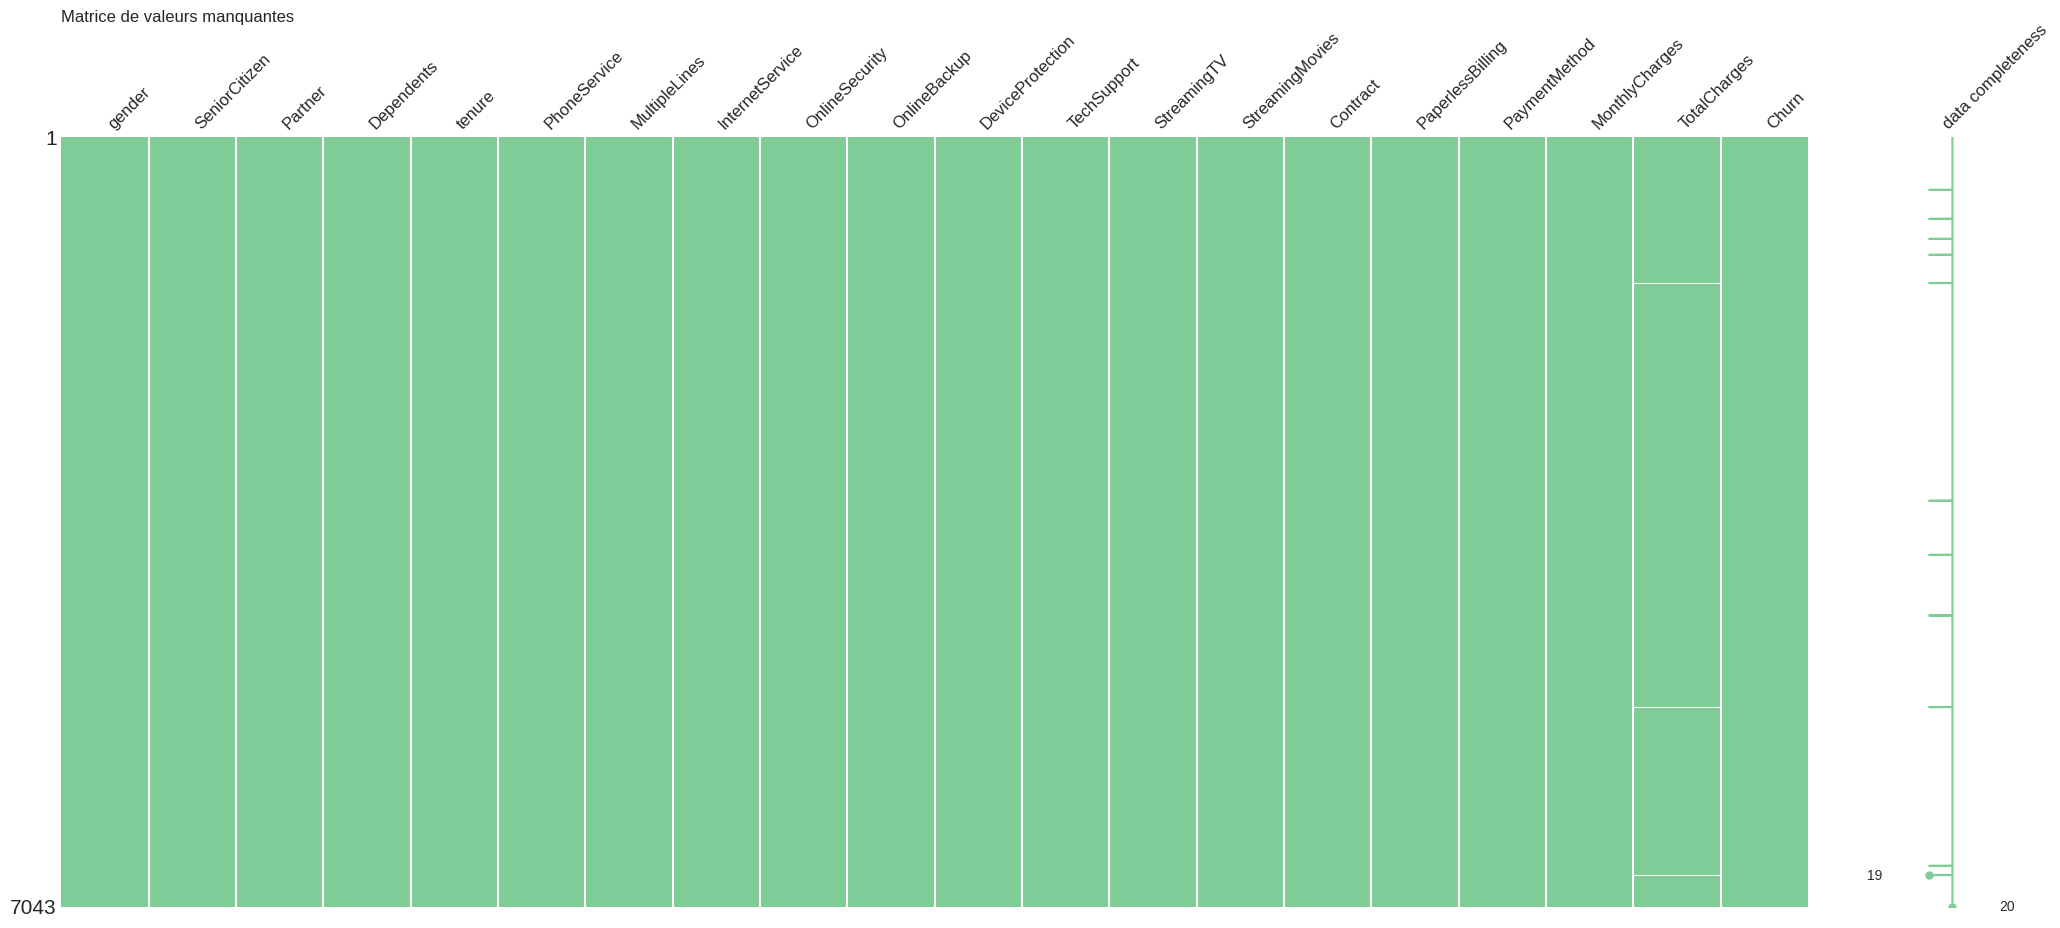

In [111]:
# @title
import missingno as msno

# Visualisation des valeurs manquantes
plt.figure(figsize=(10, 6))
msno.matrix(df,color=(0.5, 0.8, 0.6), fontsize=12,labels=True)
# plt.gca().set_facecolor("red")
plt.title("Matrice de valeurs manquantes",loc="left")
plt.show()




La variable TotalCharges est la seul variable possedant des valeurs manquantes

In [112]:
print("la variable TotalCharges a ",np.round(((df["TotalCharges"].isna().sum()/ df.shape[0])*100),4) ,"% de valeurs manquantes")
## presence de valeur manquante sur la variable TotalCharges
## Nous allons la supprimer car elle représente que 0.15 % des observations totaux il serait plus simple de les supprimer afin de pas augmenter un biais supplémentaire inutile

df.dropna(how="any",inplace=True)

# df.shape verifications


la variable TotalCharges a  0.1562 % de valeurs manquantes


Le tableau ci-dessous représente un résumé des caracteristique des variables catégorielles d'une part et d'autre part les variables numériques

* Top (Représente la valeur la plus observé)
* freq (La fréquence de la valeur la plus observé )

In [113]:
df.describe(exclude="number")

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


### Description statistique des variables numériques

In [114]:
df.describe(exclude = np.object_) #

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [115]:
df.describe(include = np.number)

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


## 2 - EDA


### 2.1 - Analyse de la variable cible : Churn

Nous commençons notre exploration en analysant la variable cible : le **Churn**. C'est cette variable qui indique si un client a résilié son abonnement (`Yes`) ou non (`No`). Comprendre sa distribution est la première étape cruciale pour évaluer la problématique.

Le graphique ci-dessous visualise la répartition des clients selon leur statut de résiliation.

Comme le montre le graphique, le dataset présente un **déséquilibre significatif** entre les deux classes. La grande majorité des clients **ne résilient pas** (`No`), représentant environ **73.4%** de l'ensemble des observations. Seule une minorité de clients **résilient** (`Yes`), soit environ **26.6%**.

Ce déséquilibre est typique des problèmes de prédiction de churn et devra être pris en compte lors de la modélisation. Un modèle prédictif devra être performant non seulement pour identifier les clients qui ne partent pas, mais surtout pour correctement identifier les clients qui sont susceptibles de résilier (la classe minoritaire).

/tmp/ipython-input-2892963159.py:19: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



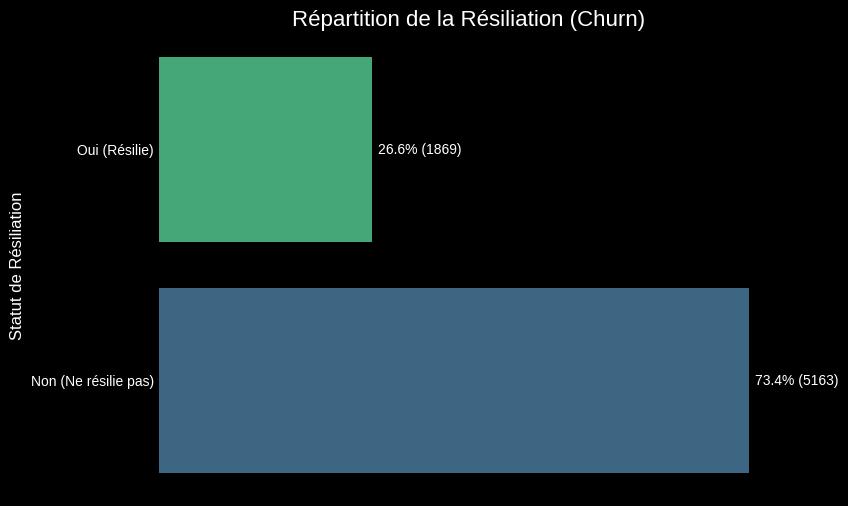

In [116]:
# @title
plt.style.use('dark_background')

# Calculer les valeurs et les pourcentages
churn_counts = df['Churn'].value_counts()
churn_percentages = df['Churn'].value_counts(normalize=True) * 100

# Créer le graphique
fig, ax = plt.subplots(figsize=(8, 6)) # Ajuster la taille pour une meilleure lisibilité

# Créer les barres horizontales
# Utiliser le DataFrame original et spécifier la colonne 'Churn'
sns.countplot(data=df, y="Churn", palette="viridis", ax=ax, hue="Churn", legend=False) # Correction ici

# Ajouter le titre et les étiquettes
ax.set_title('Répartition de la Résiliation (Churn)', fontsize=16)
ax.set_xlabel('Nombre de clients', fontsize=12)
ax.set_ylabel('Statut de Résiliation', fontsize=12)
ax.set_yticklabels(['Non (Ne résilie pas)', 'Oui (Résilie)']) # Rendre les étiquettes plus explicites

# Ajouter les pourcentages sur les barres
# Assurez-vous que l'ordre des étiquettes correspond à l'ordre des barres (souvent décroissant par défaut)
for i, (label, count) in enumerate(churn_counts.items()):
    percentage = churn_percentages[label]
    ax.text(count + 50, i, f'{percentage:.1f}% ({count})', va='center', fontsize=10) # Positionner le texte


# Inversion l'axe des y pour que "Non" soit en haut (souvent plus intuitif)
ax.invert_yaxis()

# supprimer la grille sur l'axe x ,y
ax.xaxis.grid(False)
ax.yaxis.grid(False)
# ax.axis('off')
ax.xaxis.set_visible(False) # Masquer l'axe x si les comptes sont sur les barres
# Supprimer les spines (bords de l'encadré) pour un look plus épuré
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False) # Supprimer la ligne verticale gauche


# Afficher le graphique
plt.show()

## Analyse univarié

### Variables numériques

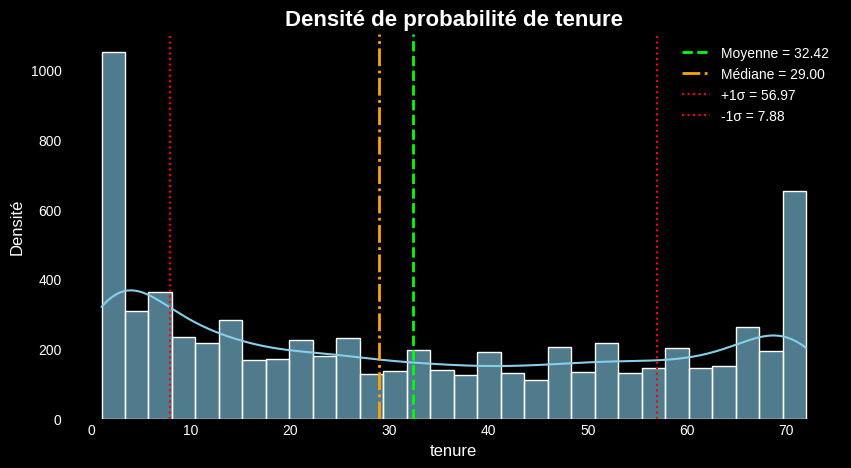

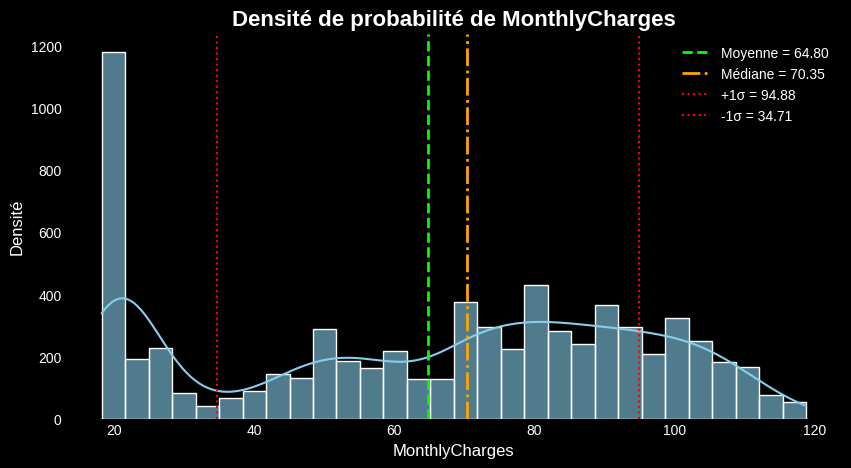

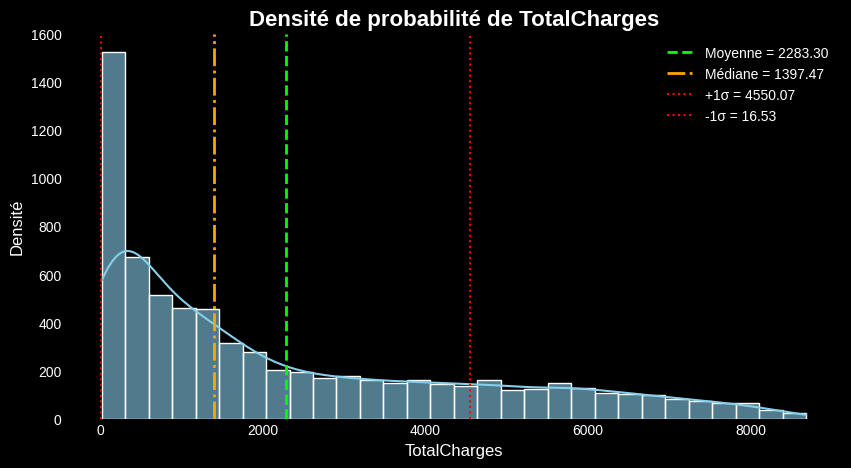

In [117]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Colonnes numériques
num_colum = df.select_dtypes(include=np.number).columns
plt.style.use('dark_background')

for col in num_colum:
    fig, ax = plt.subplots(figsize=(10, 5))

    # Histogramme + KDE
    sns.histplot(df[col], bins=30, color="skyblue", kde=True, ax=ax, alpha=0.6, edgecolor="white")

    # Statistiques
    mean_val = df[col].mean()
    median_val = df[col].median()
    std_val = df[col].std()

    # Lignes verticales
    ax.axvline(mean_val, color="lime", linestyle="--", linewidth=2, label=f"Moyenne = {mean_val:.2f}")
    ax.axvline(median_val, color="orange", linestyle="-.", linewidth=2, label=f"Médiane = {median_val:.2f}")
    ax.axvline(mean_val + std_val, color="red", linestyle=":", linewidth=1.5, label=f"+1σ = {mean_val+std_val:.2f}")
    ax.axvline(mean_val - std_val, color="red", linestyle=":", linewidth=1.5, label=f"-1σ = {mean_val-std_val:.2f}")

    # Titres et labels
    ax.set_title(f"Densité de probabilité de {col}", fontsize=16, fontweight="bold")
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Densité", fontsize=12)

    # Suppression de la grille
    ax.xaxis.grid(False)
    ax.yaxis.grid(False)

    # Légende stylée
    ax.legend(facecolor="black", edgecolor="white", fontsize=10)

    plt.show()


### Variables catégorielles

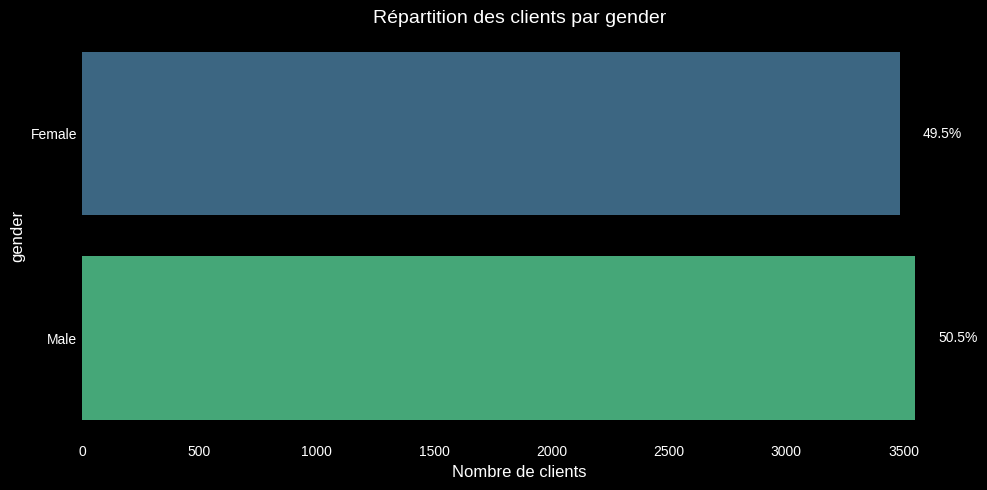

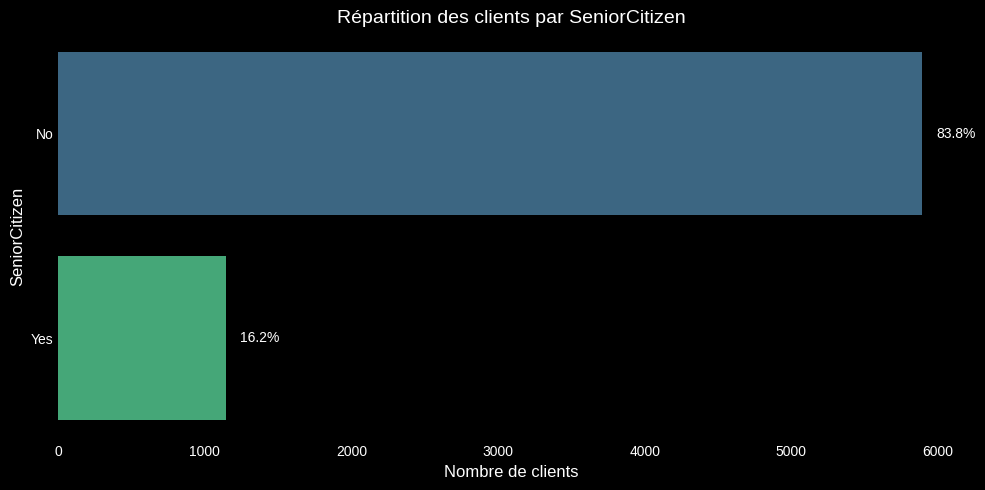

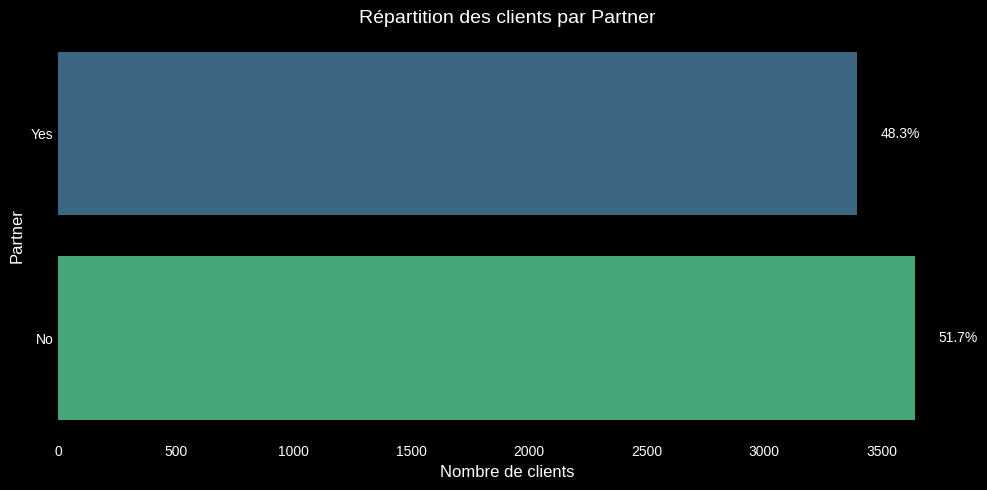

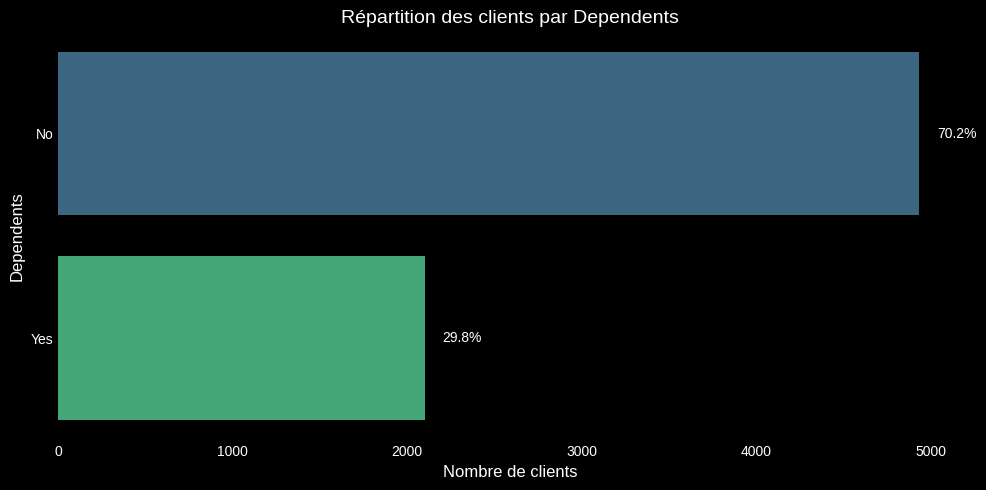

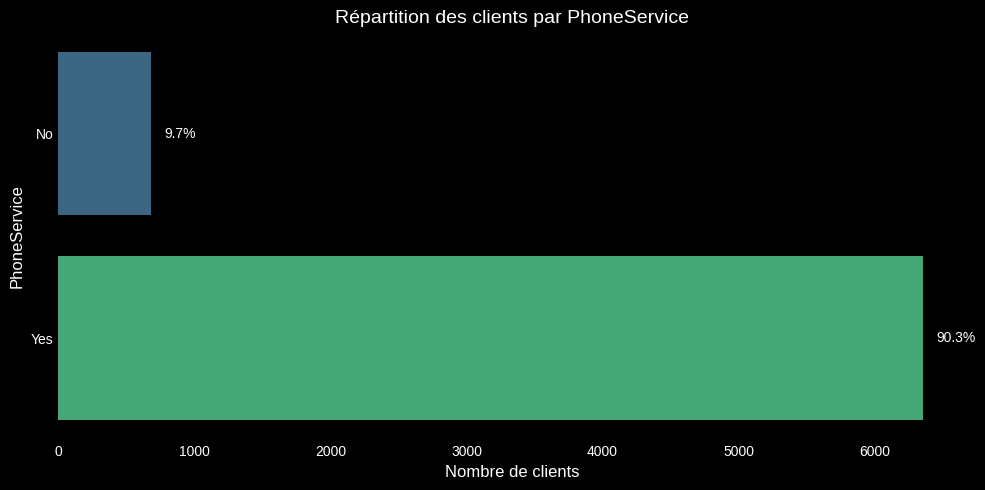

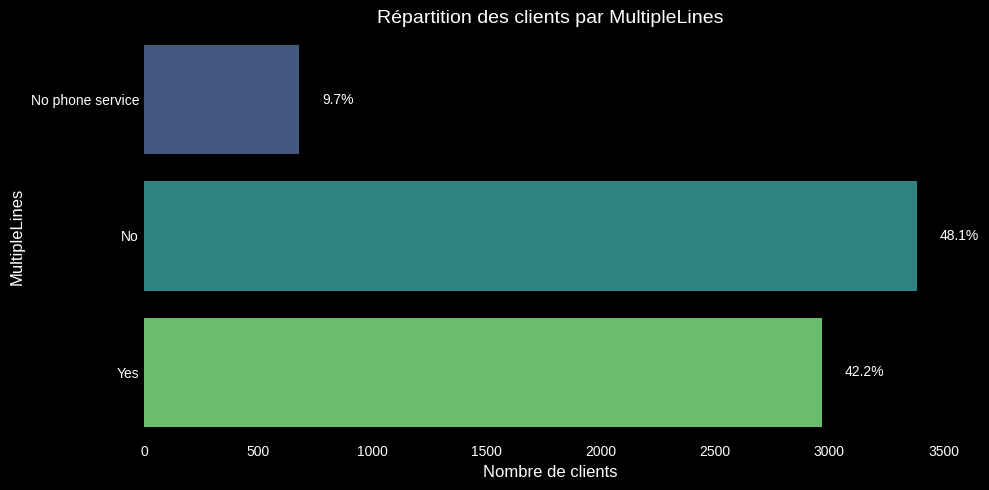

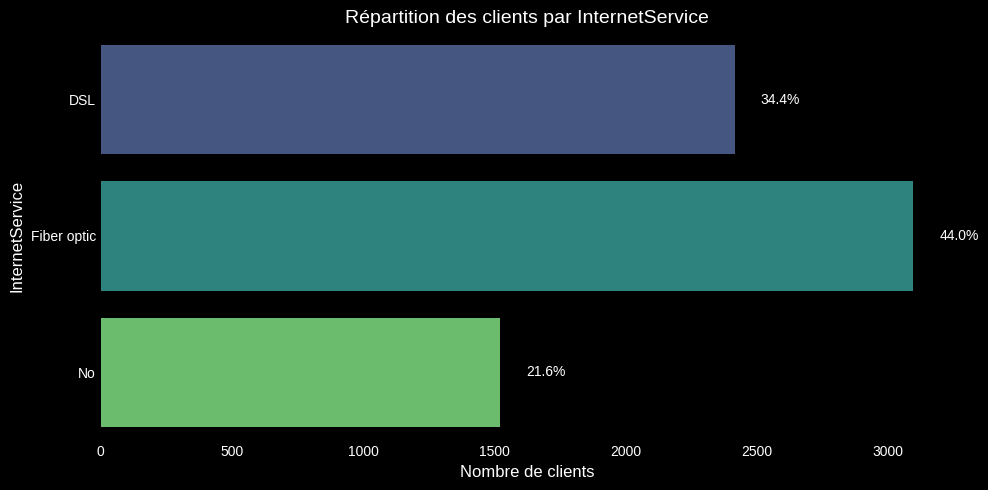

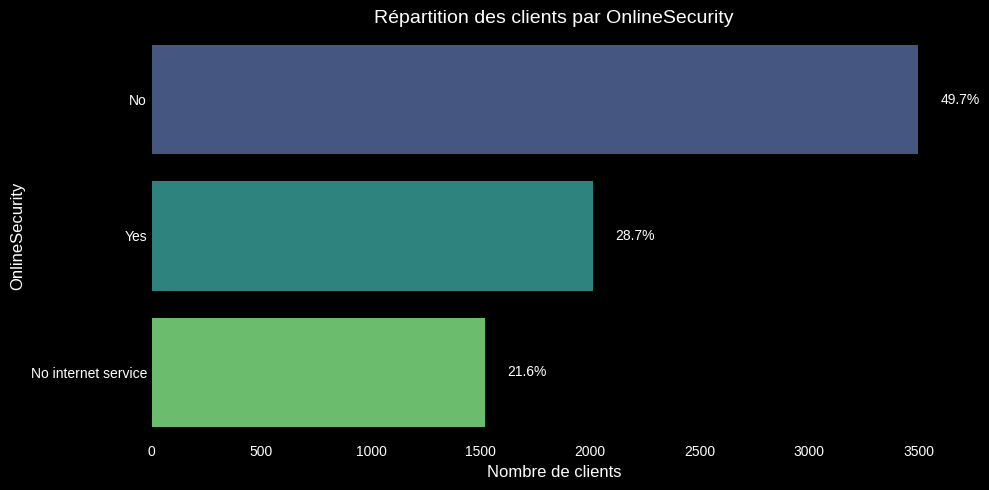

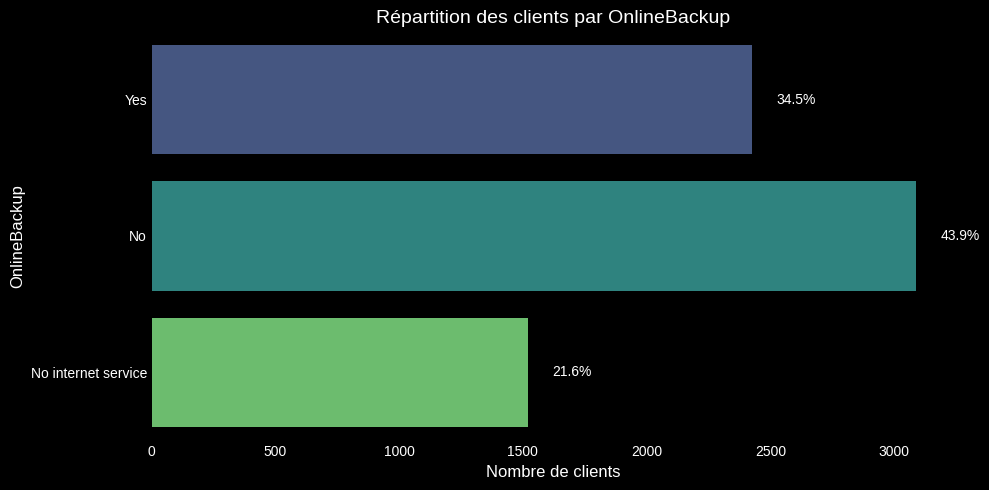

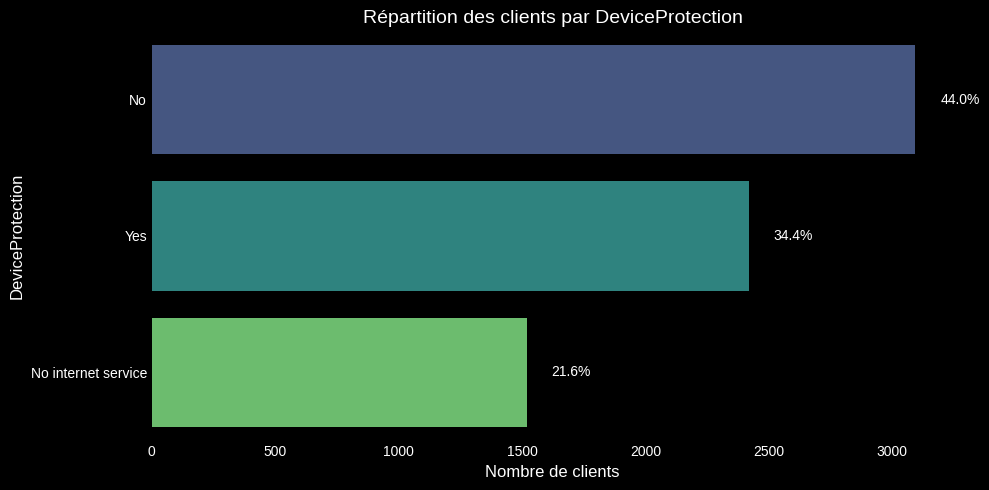

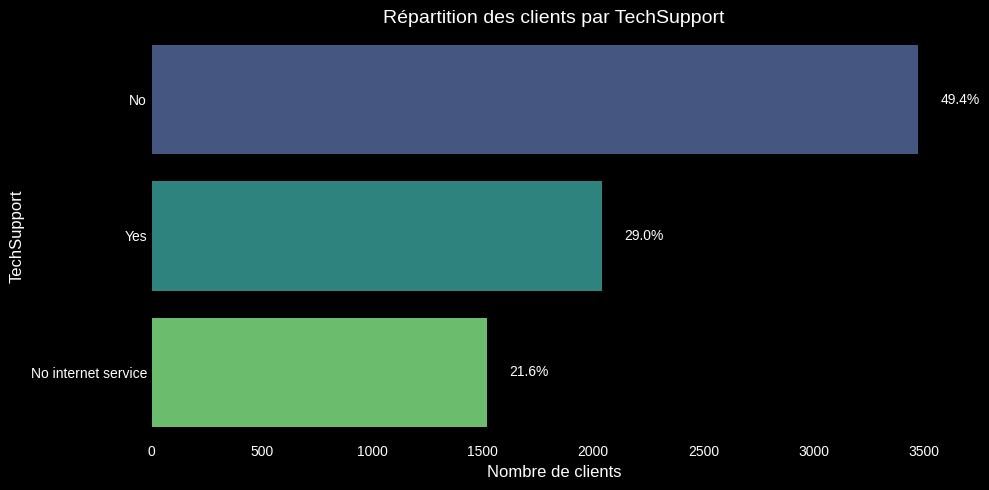

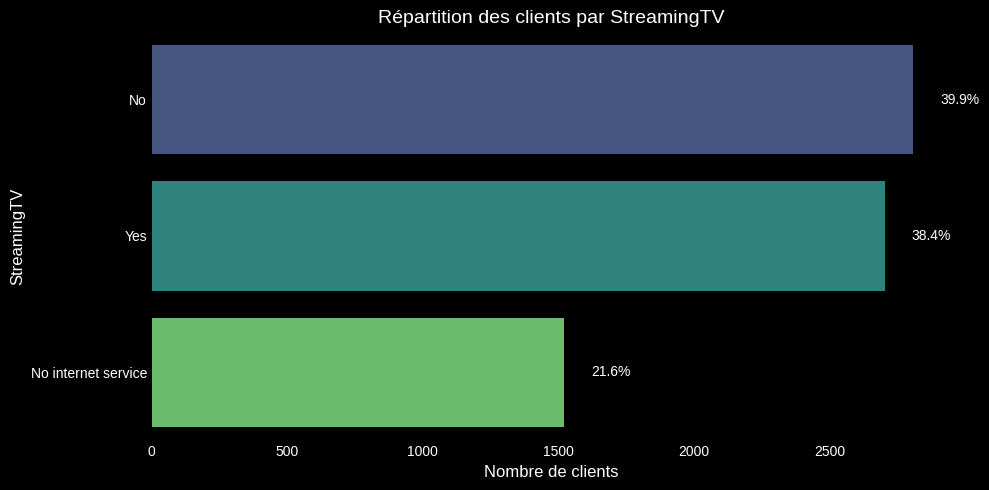

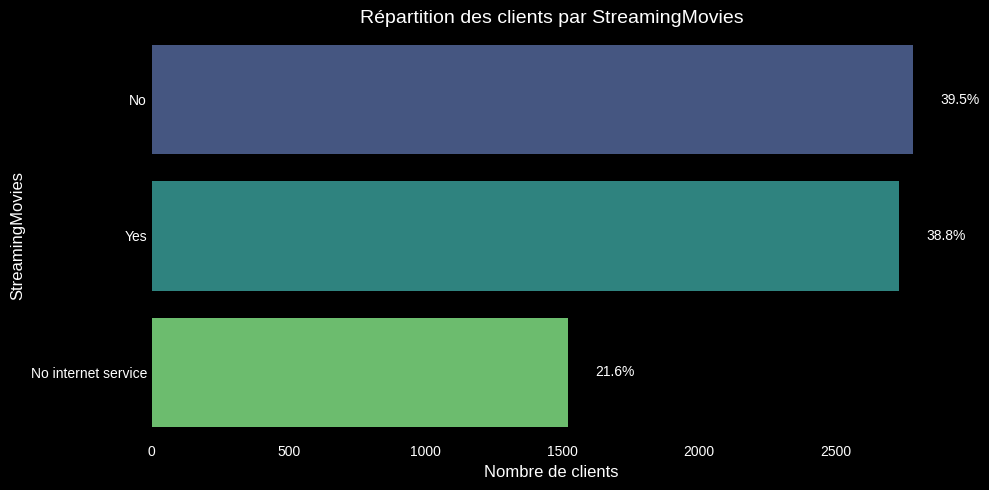

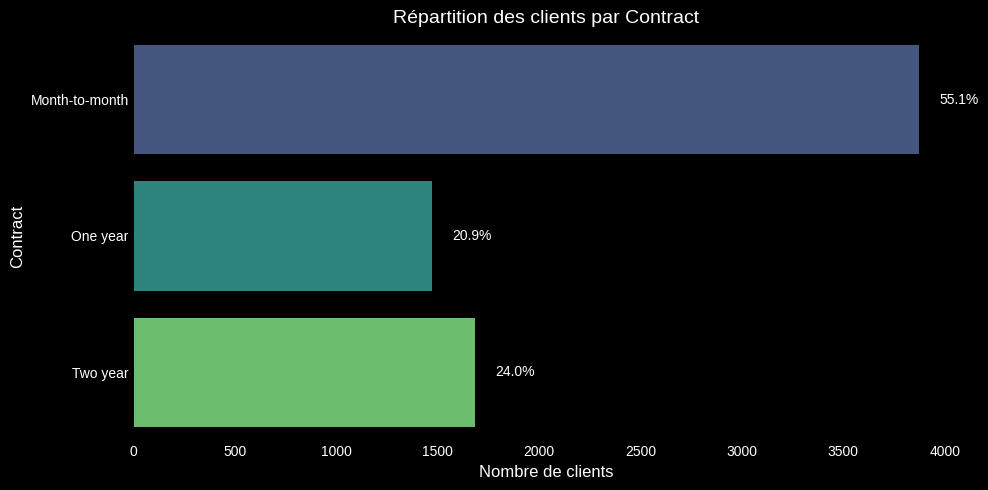

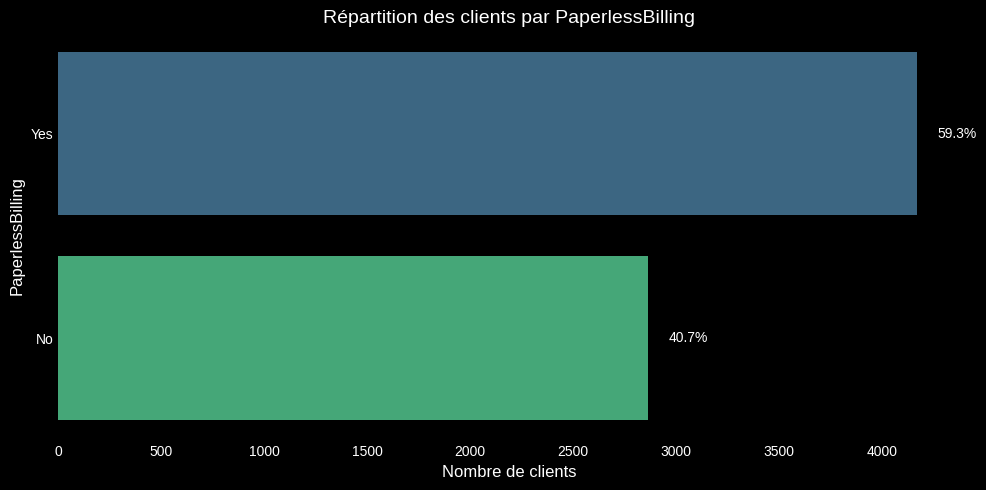

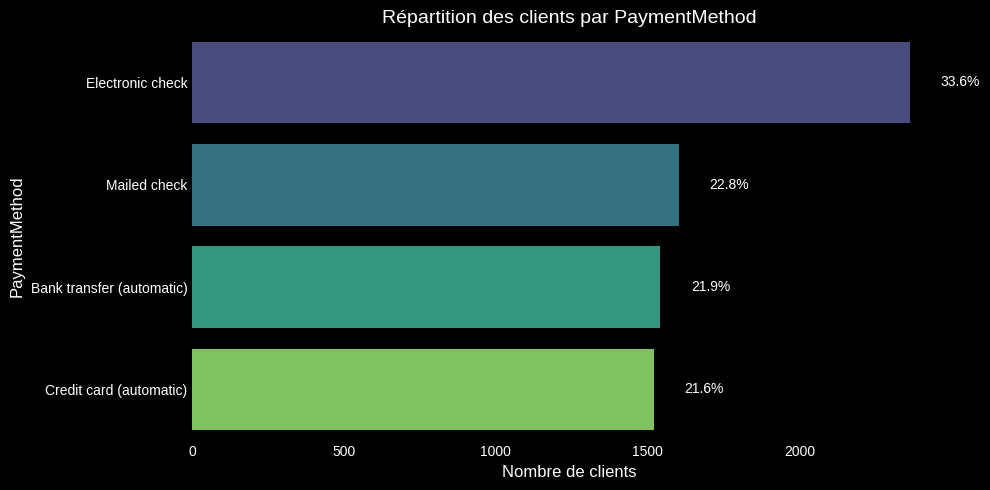

In [118]:
# @title
var_cat = df.select_dtypes(object).columns

# Exclure la variable cible 'Churn' pour l'analyse univariée des prédicteurs si vous le souhaitez
# var_cat = var_cat.drop('Churn', errors='ignore')

plt.style.use('dark_background') # S'assurer que le style est bien appliqué

for var in var_cat:
    # Ignorer la variable cible 'Churn' si elle est incluse dans var_cat
    if var == 'Churn':
        continue

    fig, ax = plt.subplots(figsize=(10, 5))

    # Utiliser une palette de couleurs de Seaborn pour plus de variété et d'esthétique
    # 'viridis', 'plasma', 'inferno', 'magma', 'cividis' fonctionnent bien sur fond sombre
    sns.countplot(data=df, y=var, palette='viridis', ax=ax,hue=var, legend=False) # Correction de l'utilisation de palette

    # Ajouter les titres et étiquettes
    ax.set_title(f'Répartition des clients par {var}', fontsize=14)
    ax.set_xlabel('Nombre de clients', fontsize=12)
    ax.set_ylabel(var, fontsize=12)

    # Supprimer les grilles pour un look plus propre
    ax.xaxis.grid(False)
    ax.yaxis.grid(False)

    # Supprimer les spines (bords de l'encadré)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Ajouter les pourcentages sur les barres
    total = len(df[var])
    for i, p in enumerate(ax.patches):
        percentage = '{:.1f}%'.format(100 * p.get_width() / total)
        x = p.get_width() + 100
        y = p.get_y() + (p.get_height() / 2 )
        ax.annotate(percentage, (x, y), ha='left', va='center', fontsize=10, color='white') # Annotation avec pourcentage

    plt.tight_layout() # Ajuster l'espace entre les graphiques
    plt.show()

### Variables catégorielles

Après avoir analysé la distribution de la variable cible `Churn`, examinons maintenant la répartition de nos variables catégorielles. Ces graphiques nous donnent un aperçu de la composition de notre clientèle selon différents critères.

*   **gender (Genre) :** Le graphique montre une répartition presque égale entre les clients hommes et femmes. Cela suggère que le genre seul pourrait ne pas être un facteur majeur de différenciation pour le churn, mais nous devrons confirmer cela avec une analyse bivariée.
*   **SeniorCitizen :** La grande majorité des clients ne sont pas des personnes âgées (`No`). Les personnes âgées (`Yes`) représentent une petite proportion de l'ensemble de la clientèle.
*   **Partner (Partenaire) et Dependents (Personnes à charge) :** Une majorité de clients n'ont pas de partenaire ni de personnes à charge.
*   **PhoneService (Service Téléphonique) :** La grande majorité des clients ont un service téléphonique. Seule une petite partie n'en a pas.
*   **MultipleLines (Plusieurs Lignes) :** Parmi les clients ayant un service téléphonique, la répartition entre ceux qui ont une seule ligne (`No`) et ceux qui en ont plusieurs (`Yes`) est assez équilibrée. Un certain nombre de clients n'ont pas de service téléphonique ("No phone service").
*   **InternetService (Service Internet) :** Le service Internet par fibre optique est le plus populaire, suivi du DSL. Un nombre significatif de clients n'ont pas de service Internet.
*   **OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies :** Pour ces services additionnels liés à Internet, la catégorie la plus fréquente est souvent "No" ou "No internet service". Cela indique que de nombreux clients n'ont pas souscrit à ces options de sécurité, de sauvegarde, de protection d'appareil, de support technique, ou de streaming. La catégorie "No internet service" regroupe les clients qui n'ont pas de service internet du tout.
*   **Contract (Contrat) :** Le type de contrat "Month-to-month" (mois par mois) est de loin le plus courant, suivi des contrats d'un an et de deux ans. Les contrats à court terme ("Month-to-month") sont souvent associés à une plus grande flexibilité mais potentiellement aussi à un risque de churn plus élevé, un point à explorer dans l'analyse bivariée.
*   **PaperlessBilling (Facturation sans papier) :** Une majorité de clients ont opté pour la facturation sans papier.
*   **PaymentMethod (Méthode de Paiement) :** Le chèque électronique (`Electronic check`) est la méthode de paiement la plus fréquente, suivie du chèque envoyé par courrier (`Mailed check`), du virement bancaire automatique (`Bank transfer (automatic)`) et de la carte de crédit automatique (`Credit card (automatic)`).

Cette analyse univariée des variables catégorielles nous donne une image de base des caractéristiques de la clientèle. L'étape suivante consistera à croiser ces variables avec la variable cible `Churn` pour voir quelles catégories sont plus ou moins sujettes à la résiliation.

## Analyse bivariés

### variables numériques

Les graphiques ci-dessous visualisent la distribution des variables numériques (`tenure`, `MonthlyCharges`, `TotalCharges`) en séparant les clients qui ont résilié (`Yes`) de ceux qui ne l'ont pas fait (`No`). L'observation de ces distributions est essentielle pour comprendre comment ces facteurs numériques sont liés à la probabilité de résiliation.

*   **tenure (Durée d'engagement) :**
    *   Le graphique de `tenure` montre une différence très marquée entre les clients qui résilient et ceux qui ne résilient pas. La distribution pour les clients qui résilient (`Churn = Yes`) est fortement concentrée vers les faibles valeurs de `tenure` (proche de 0). Cela indique que les **clients récents** sont beaucoup plus susceptibles de résilier.
    *   À l'inverse, la distribution pour les clients qui ne résilient pas (`Churn = No`) est plus étalée et présente un pic vers les valeurs de `tenure` élevées (vers 70 mois). Cela confirme que les **clients fidèles avec une longue ancienneté** sont moins enclins à quitter l'entreprise.

*   **MonthlyCharges (Frais Mensuels) :**
    *   Le graphique des `MonthlyCharges` révèle que les clients qui résilient (`Churn = Yes`) ont tendance à avoir des **frais mensuels plus élevés** par rapport à ceux qui ne résilient pas (`Churn = No`). La courbe de densité pour "Yes" est plus haute dans la plage des frais mensuels élevés.
    *   Cela pourrait suggérer que les clients payant pour des services plus coûteux ou des forfaits plus complets sont plus à risque de résiliation.

*   **TotalCharges (Frais Totaux) :**
    *   Le graphique des `TotalCharges` montre une forte asymétrie positive pour les deux groupes, mais avec des différences notables. La distribution pour les clients qui résilient (`Churn = Yes`) est beaucoup plus concentrée sur les **faibles valeurs de `TotalCharges`**.
    *   Ceci est logique et cohérent avec l'observation sur `tenure`. Les clients récents (faible `tenure`) auront nécessairement des `TotalCharges` faibles, et puisque les clients récents sont plus susceptibles de résilier, il en résulte une concentration de `TotalCharges` faibles parmi les clients qui ont churné.
    *   Les clients qui ne résilient pas (`Churn = No`) ont une distribution de `TotalCharges` beaucoup plus étalée vers les valeurs élevées, ce qui est attendu pour des clients ayant une longue ancienneté.

En résumé, l'analyse bivariée des variables numériques met en évidence que la **faible ancienneté**, les **frais mensuels élevés** et donc les **frais totaux faibles** sont des indicateurs clés d'une probabilité de résiliation plus élevée. Ces informations seront très importantes pour la modélisation et l'identification des clients à risque.

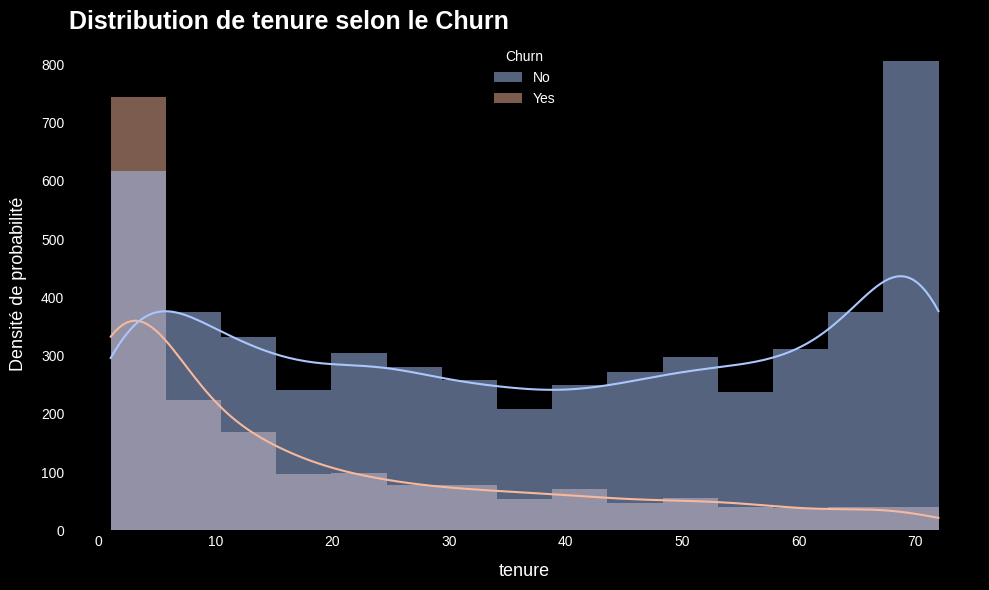

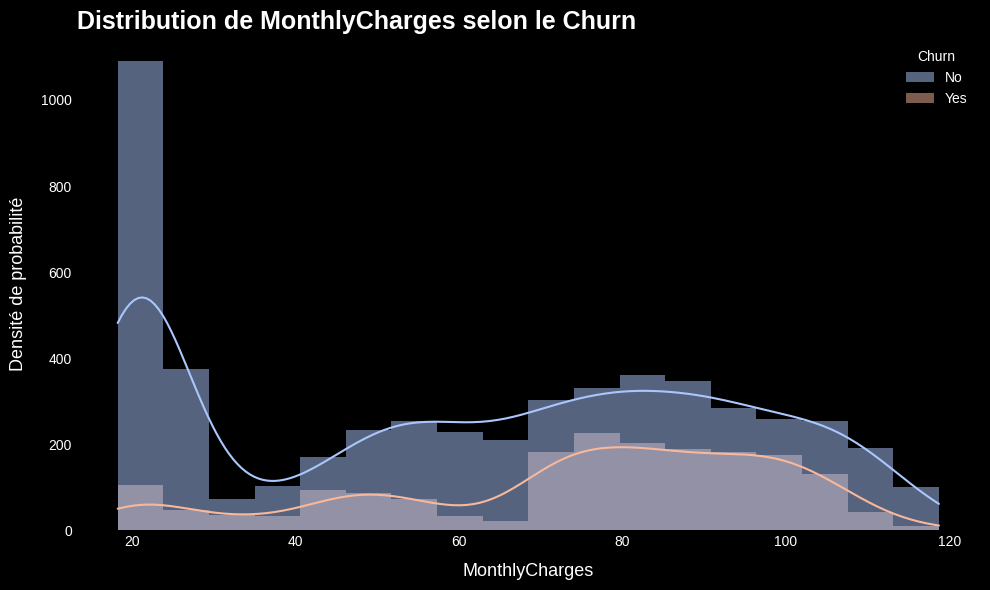

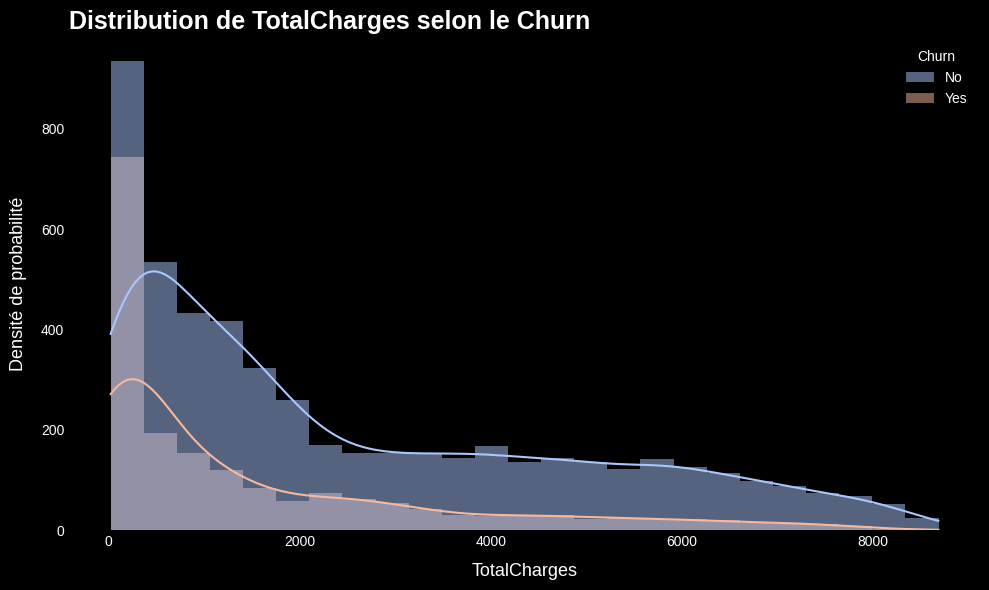

In [119]:
for val in num_colum:
    fig, ax = plt.subplots(figsize=(10, 6))

    # Histogramme + KDE avec palette personnalisée
    sns.histplot(
        data=df,
        x=val,
        hue="Churn",
        kde=True,
        ax=ax,
        palette=sns.color_palette("coolwarm", 2), # couleurs pro
        common_norm=False,
        # alpha=0.6, # transparence pour mieux voir les superpositions
        edgecolor=None
    )

    # Titres et labels
    ax.set_title(f"Distribution de {val} selon le Churn", fontsize=18, fontweight="bold", loc="left")
    ax.set_xlabel(val, fontsize=13, labelpad=10)
    ax.set_ylabel("Densité de probabilité", fontsize=13, labelpad=10)

    # Légende personnalisée
    # ax.legend(
    #     title="Churn",
    #     title_fontsize=12,
    #     fontsize=11,
    #     loc="upper right"
    # )

    # Style du graphique
    ax.xaxis.grid(False)
    ax.yaxis.grid(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    plt.tight_layout()
    plt.show()


#### Test de Mann-WhitneyU et boxplot (pour une observations plus **marqué**
Nous avons vu précédemment que les distributions des variables numérique etais trop asymétrique pour être des variables suivant une distribution **gaussienne** c'est pour cela nous allons utilisé le test **Mann-WithneyU** afin de confirmé cette différence significative entre les variables explicatives `TotalCharges` & `MontlyhCharges` en fonction du churn (`Churn == Yes` & `Churn == No`)

In [120]:
# @title

# Boxplot tenure vs Churn
fig = px.box(
    df,
    x="Churn",
    y="MonthlyCharges",
    color="Churn",
    color_discrete_map={"Yes": "red", "No": "lightblue"},
    points="outliers",  # afficher toutes les données suspectedoutliers
)

# Mise en forme du layout
fig.update_layout(
    # plot_bgcolor='black',        # fond du graphique
    # paper_bgcolor='black',       # fond global
    font=dict(color='white', size=14),  # couleur et taille de police
    title=dict(
        text="Distribution de la charge mensuelle selon le Churn",
        font=dict(size=20, color="white", family="Arial"),
        x=0.01,  # alignement gauche
        xanchor='left'
    ),
    xaxis_title="Churn",
    yaxis_title="Charge mensuelle",
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor='gray', gridwidth=0.5),
    legend_title="Churn",
    legend=dict(font=dict(size=12, color="white")),
    # ajouter une limite sur l'axe y
    yaxis_range=[10, 170]
)

# Ajouter un texte explicatif (storytelling)
fig.add_annotation(
    text="Les clients qui résilient ont tendance à avoir une charge mensuelle plus élevée.",
    xref="paper", yref="paper",
    x=0.5, y=1.05, showarrow=False, font=dict(size=14, color="gray")
)

fig.show()

# Boxplot tenure vs Churn
fig = px.box(
    df,
    x="Churn",
    y="TotalCharges",
    color="Churn",
    color_discrete_map={"Yes": "red", "No": "lightblue"},
    points="outliers",  # afficher toutes les données suspectedoutliers
)

# Mise en forme du layout
fig.update_layout(
    # plot_bgcolor='black',        # fond du graphique
    # paper_bgcolor='black',       # fond global
    font=dict(color='white', size=14),  # couleur et taille de police
    title=dict(
        text="Distribution de la charge total selon le Churn",
        font=dict(size=20, color="white", family="Arial"),
        x=0.01,  # alignement gauche
        xanchor='left'
    ),
    xaxis_title="Churn",
    yaxis_title="Charge total",
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor='gray', gridwidth=0.5),
    legend_title="Churn",
    legend=dict(font=dict(size=12, color="white"))
    # ajouter une limite sur l'axe y
    # yaxis_range=[15, 60]
)

# Ajouter un texte explicatif (storytelling)
fig.add_annotation(
    text="Les clients qui résilient ont tendance a avoir une charge annuelle moins élevée\ "+"que ceux qui reste dans la boite",
    xref="paper", yref="paper",
    x=0.5, y=1.05, showarrow=False, font=dict(size=14, color="gray")
)

fig.show()


alpha = 0.05



pos = df[df["Churn"]=="Yes"]["MonthlyCharges"]
neg = df[df["Churn"]=="No"]["MonthlyCharges"]

stat, pval = stats.mannwhitneyu(pos, neg, alternative='greater')  # 'greater' pour tester pos > neg
print("-----------------------------------------------------------")
print("le test de Mann-Whitney U pour la variable MonthlyCharges en fonction du churn")
print("Nous avons tester l'hypothèse selon laquel Les churné ont des charges mensuelles plus élevés que les nons churné " )
print("Statistique U :", stat)
if pval < alpha:
    print(f"✅ Hypothèse confirmée (p < {alpha})")
else:
    print(f"❌ Hypothèse NON confirmée (p >= {alpha})")
print("-----------------------------------------------------------")
print("-----------------------------------------------------------")



pos = df[df["Churn"]=="Yes"]["TotalCharges"]
neg = df[df["Churn"]=="No"]["TotalCharges"]

stat, pval = stats.mannwhitneyu(pos, neg, alternative='less')  # 'less' pour tester pos < neg
print("le test de Mann-Whitney U pour la variable TotalCharges en fonction du churn")
print("Nous testons l’hypothèse selon laquelle les clients churnés "
      "ont une charge TOTALE plus élevée que ceux qui ne churnent pas.")
print("Statistique U :", stat)
if pval < alpha:
    print(f"✅ Hypothèse confirmée (p < {alpha})")
else:
    print(f"❌ Hypothèse NON confirmée (p >= {alpha})")




-----------------------------------------------------------
le test de Mann-Whitney U pour la variable MonthlyCharges en fonction du churn
Nous avons tester l'hypothèse selon laquel Les churné ont des charges mensuelles plus élevés que les nons churné 
Statistique U : 5986148.5
✅ Hypothèse confirmée (p < 0.05)
-----------------------------------------------------------
-----------------------------------------------------------
le test de Mann-Whitney U pour la variable TotalCharges en fonction du churn
Nous testons l’hypothèse selon laquelle les clients churnés ont une charge TOTALE plus élevée que ceux qui ne churnent pas.
Statistique U : 3360665.0
✅ Hypothèse confirmée (p < 0.05)


#### Tenure vs Churn

En examinant le taux de churn selon les tranches d’ancienneté (tenure_group), on observe une tendance claire :

* Clients récents (1-12 mois) : le churn est très élevé (~48 %). Presque la moitié des nouveaux clients résilient rapidement, ce qui suggère un problème potentiel d’onboarding ou d’adéquation du service.

* Clients entre 13 et 24 mois : le churn diminue à ~29 %. Les clients qui passent leur première année sans résilier sont plus stables.

* Clients entre 25 et 48 mois : le churn continue de décroître (~19-22 %), indiquant un renforcement progressif de la fidélité.

* Clients de longue durée (49-72 mois) : le churn est très faible (~6-14 %), montrant que les clients loyaux restent majoritairement abonnés.

Conclusion : le churn est fortement concentré sur la première année d’abonnement. Pour réduire le churn global, il serait stratégique de cibler des actions de fidélisation et d’accompagnement pour les nouveaux clients, comme un meilleur onboarding, des promotions ciblées ou un suivi client personnalisé.

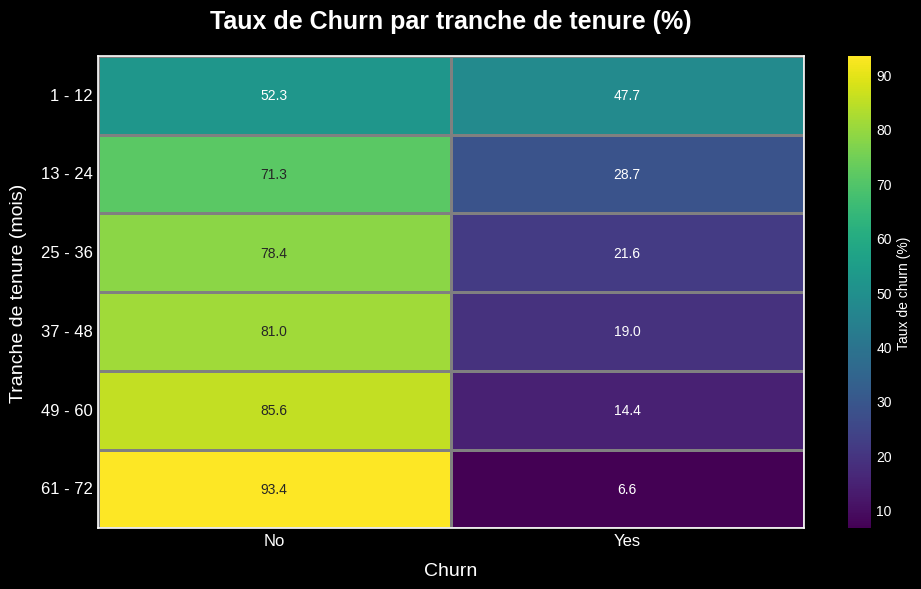

In [121]:
# @title

labels = ["{0} - {1}".format(i,i+11) for i in range(1,72,12)]
df["tenure_group"] = pd.cut(df["tenure"], range(1,80,12), right=False, labels=labels)
df["tenure_group"].value_counts()
# Calcul du churn par tranche de tenure
tenure_churn = pd.crosstab(df["tenure_group"], df["Churn"], normalize='index') * 100
# print(tenure_churn)
# Figure
fig, ax = plt.subplots(figsize=(10, 6))

# Heatmap personnalisée
sns.heatmap(
    tenure_churn,
    annot=True,                # afficher les valeurs
    fmt=".1f",                 # format des annotations
    cmap="viridis",            # palette de couleur
    linewidths=0.8,            # lignes entre les cases
    linecolor='gray',          # couleur des lignes
    cbar_kws={'label': 'Taux de churn (%)', 'orientation': 'vertical'},  # légende couleur
    ax=ax
)

# Titres et labels
ax.set_title("Taux de Churn par tranche de tenure (%)", fontsize=18, fontweight='bold', loc='center', pad=20)
ax.set_xlabel("Churn", fontsize=14, labelpad=10)
ax.set_ylabel("Tranche de tenure (mois)", fontsize=14, labelpad=10)

# Rotation des labels pour meilleure lisibilité
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Ajouter des bordures autour des cases
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_color('white')
    spine.set_linewidth(1.2)

# Ajustement layout
plt.tight_layout()

plt.show()


### Variable catégorielles

Pour compléter notre analyse bivariée, nous allons maintenant examiner la relation entre chaque variable catégorielle et la variable cible `Churn`. L'objectif est de déterminer si certaines catégories de clients (par sexe, type de contrat, service internet, etc.) sont plus sujettes à la résiliation que d'autres.

Les graphiques à barres empilées ci-dessous visualisent la répartition du Churn (`Yes` ou `No`) au sein de chaque catégorie. Les pourcentages affichés sur les barres indiquent la proportion de clients ayant résilié ou non au sein de cette catégorie spécifique. Cela nous permettra d'identifier visuellement les catégories associées à un taux de churn plus élevé.

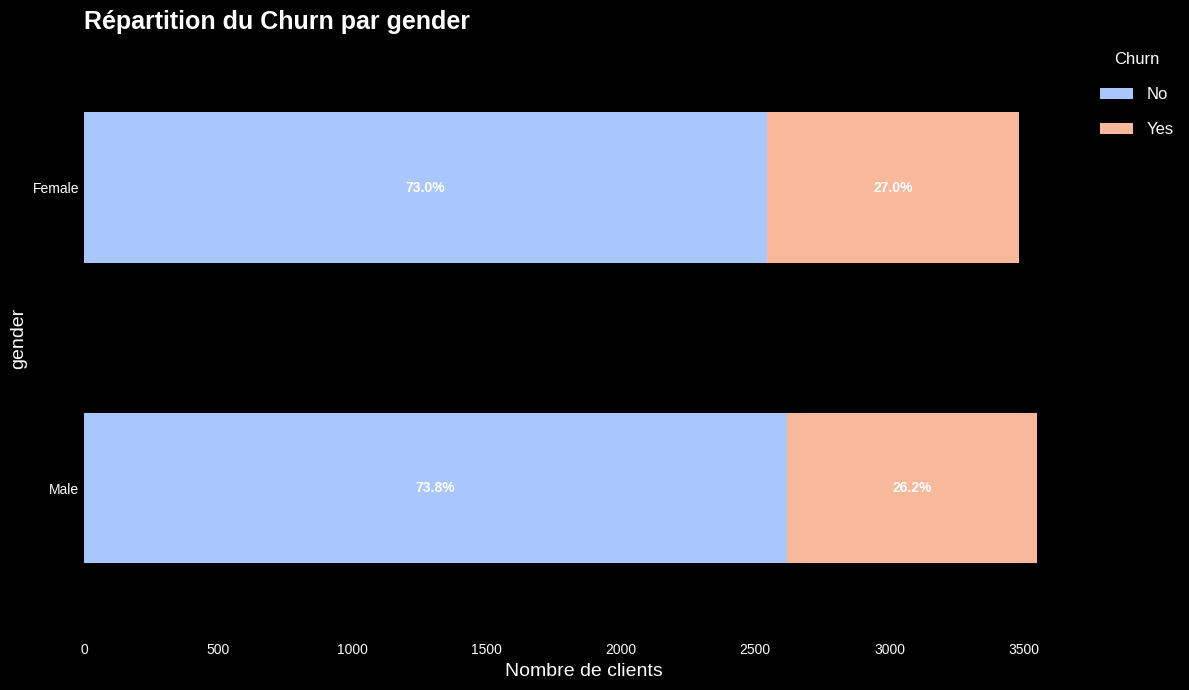

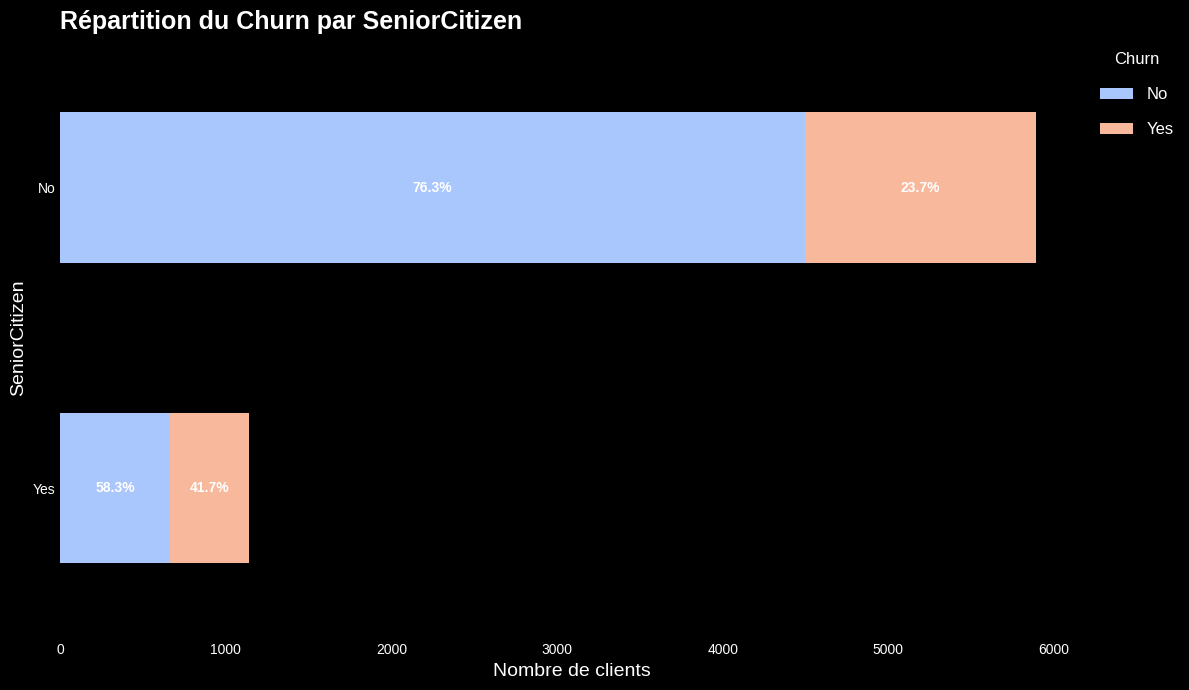

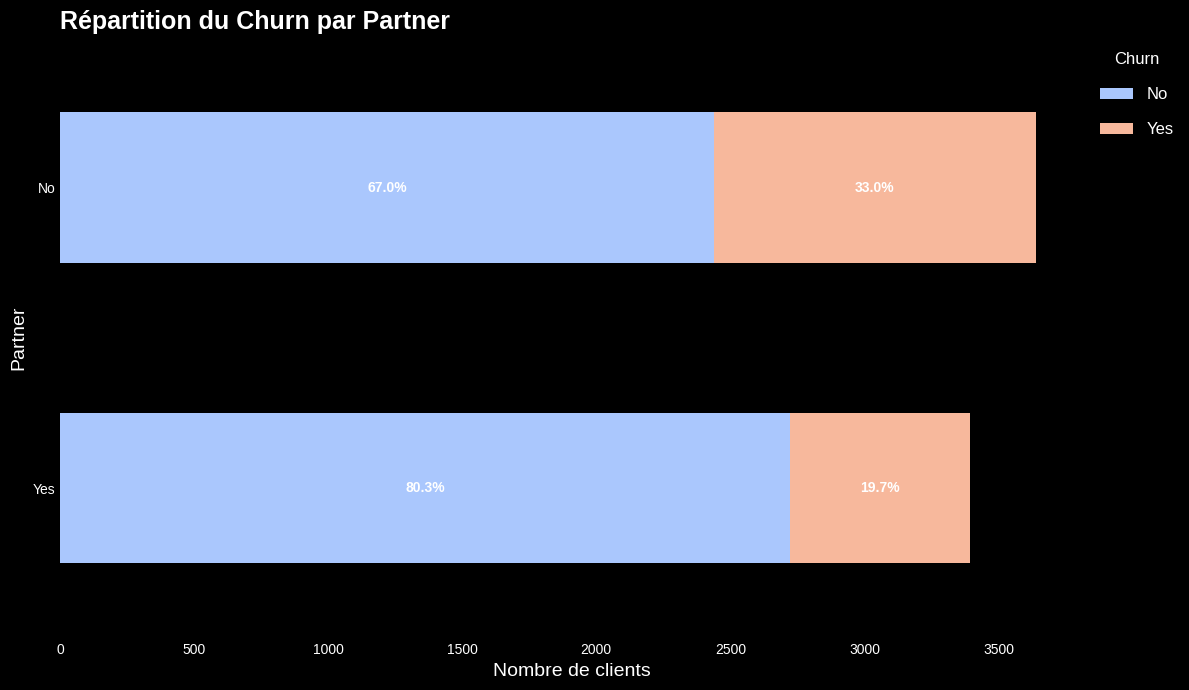

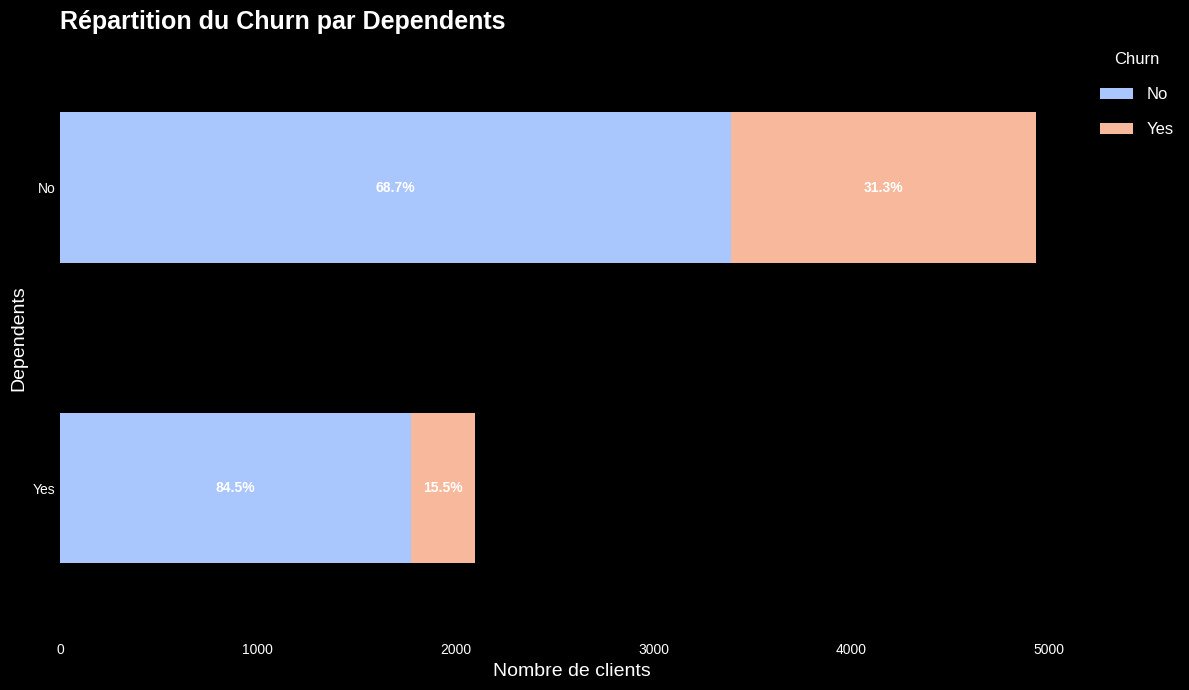

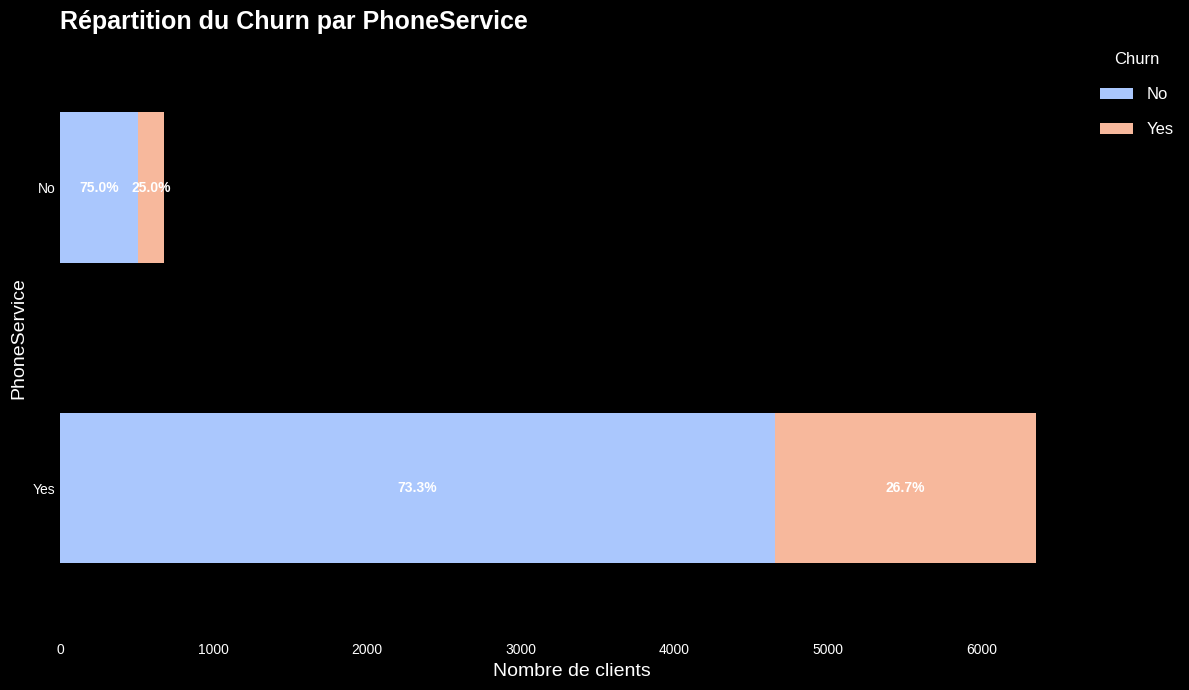

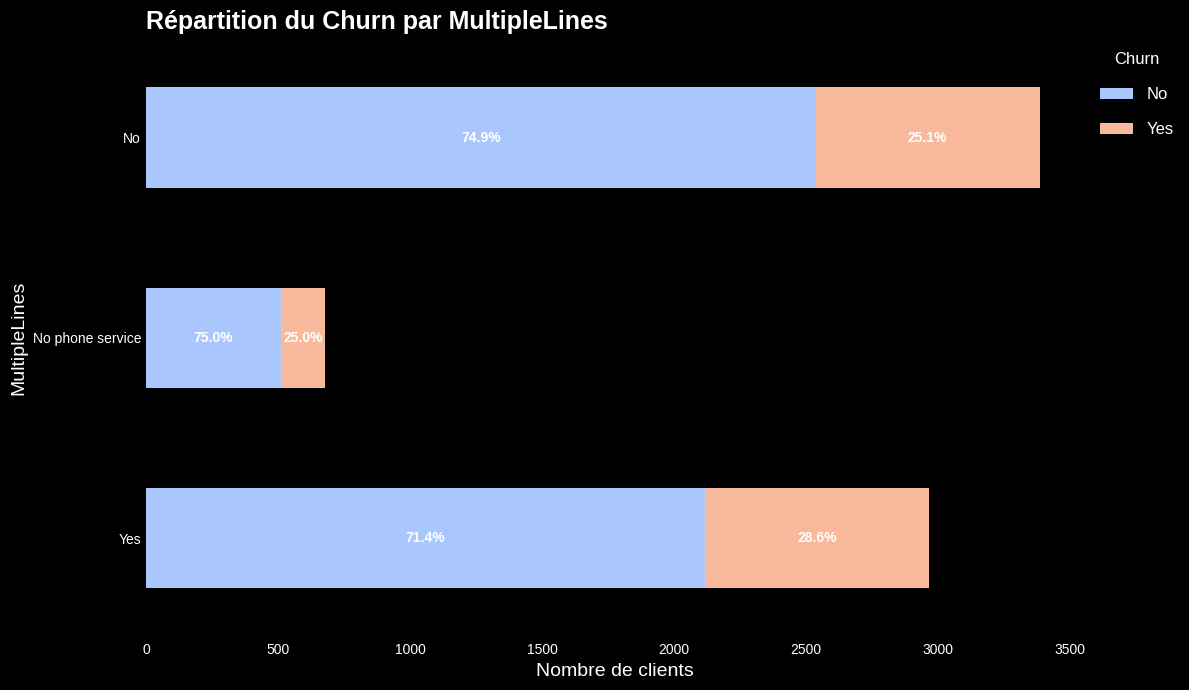

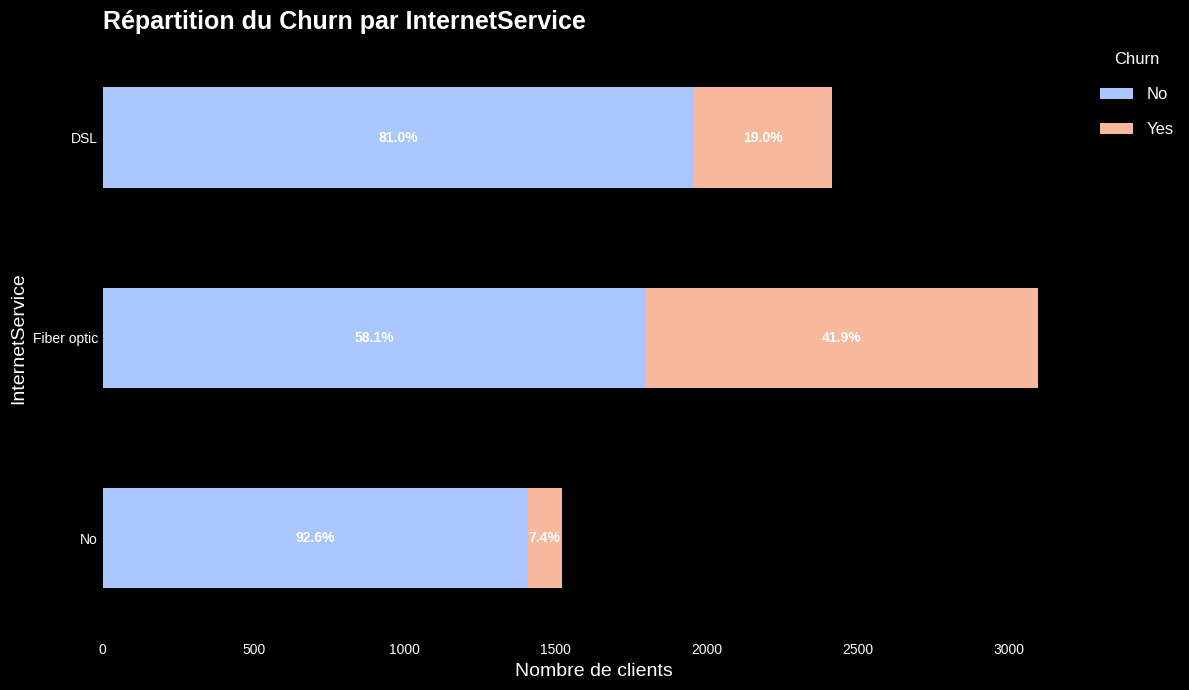

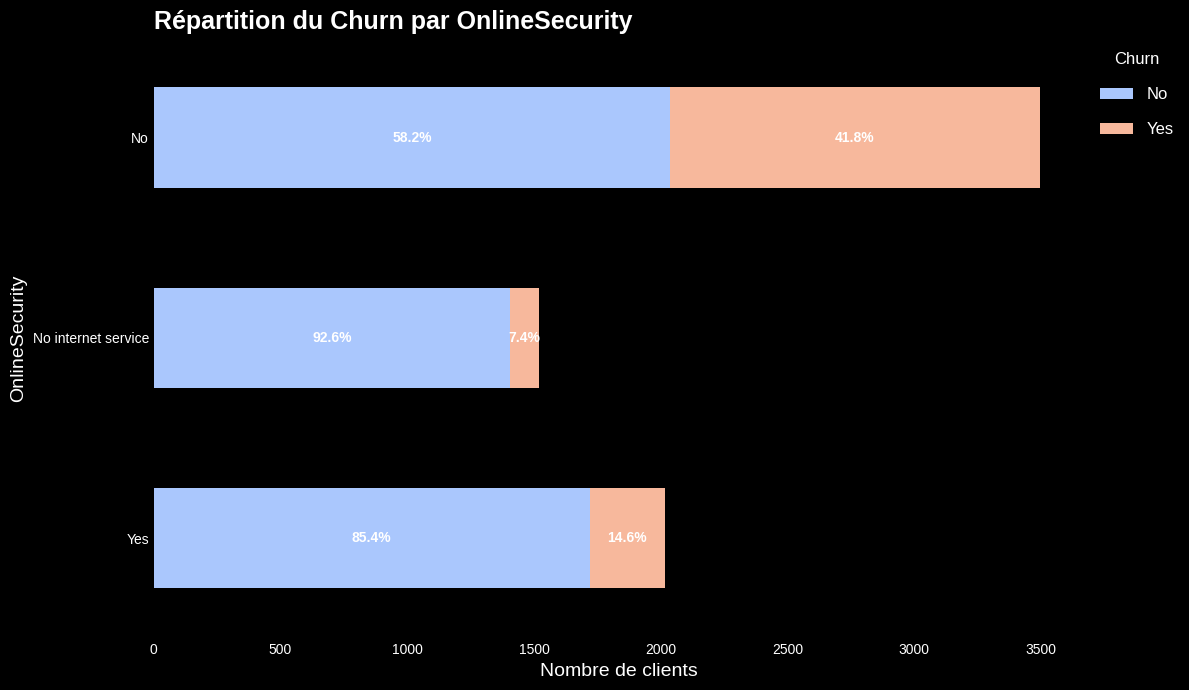

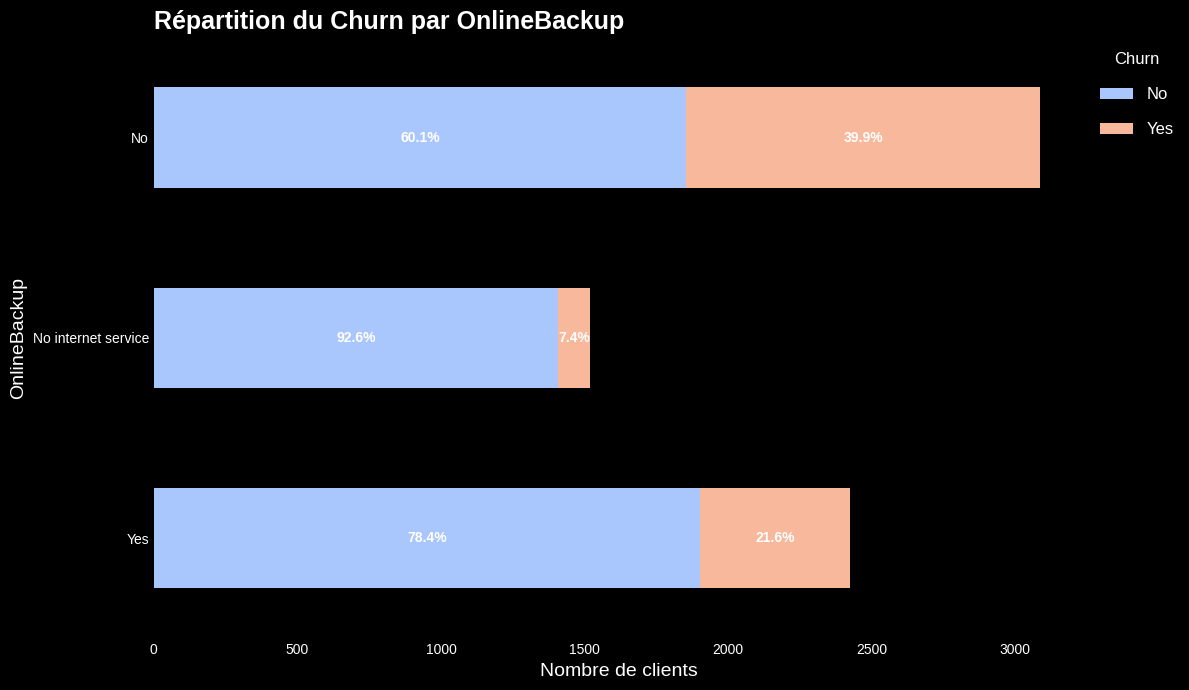

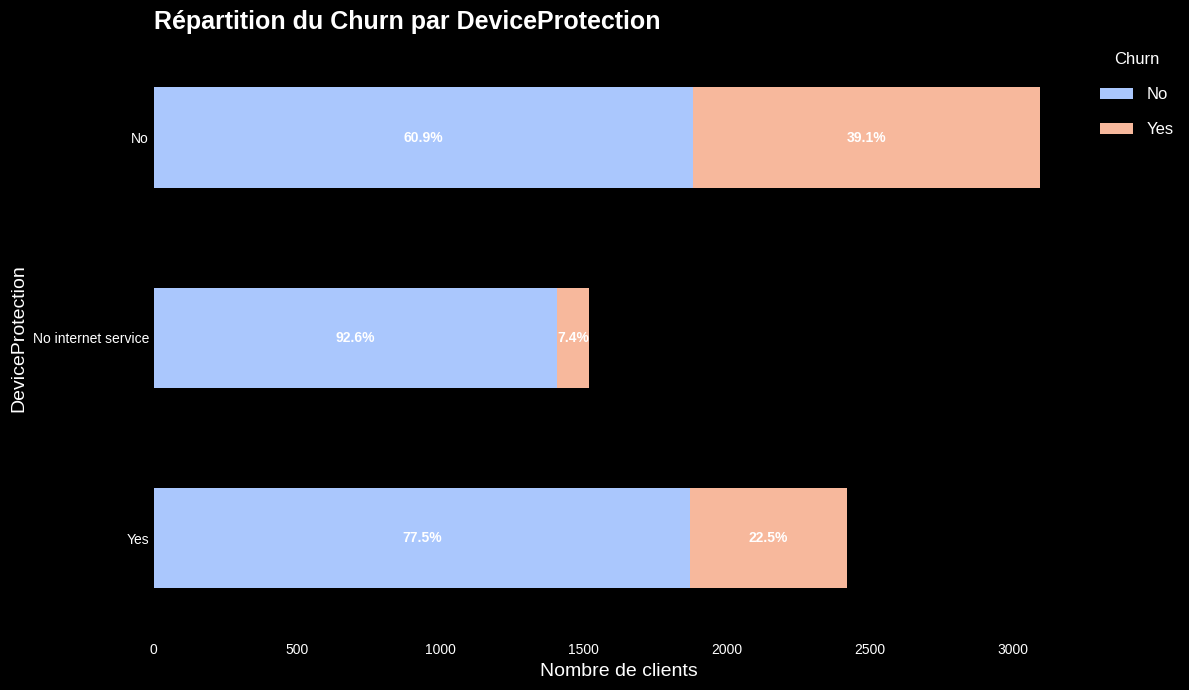

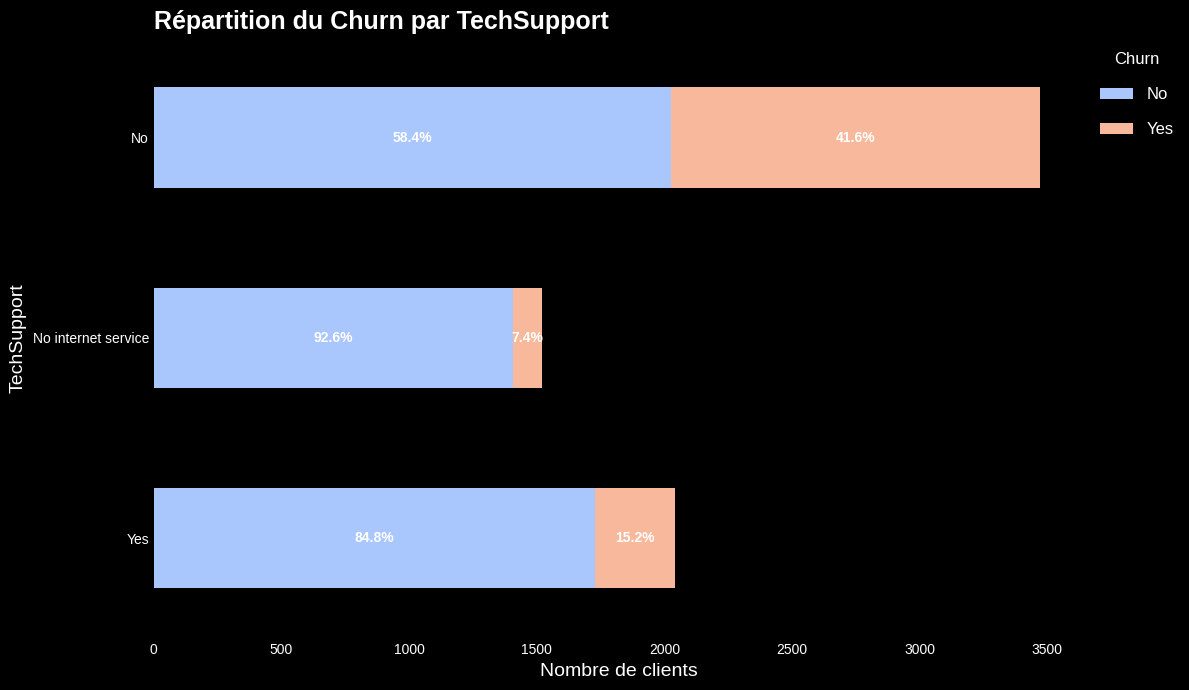

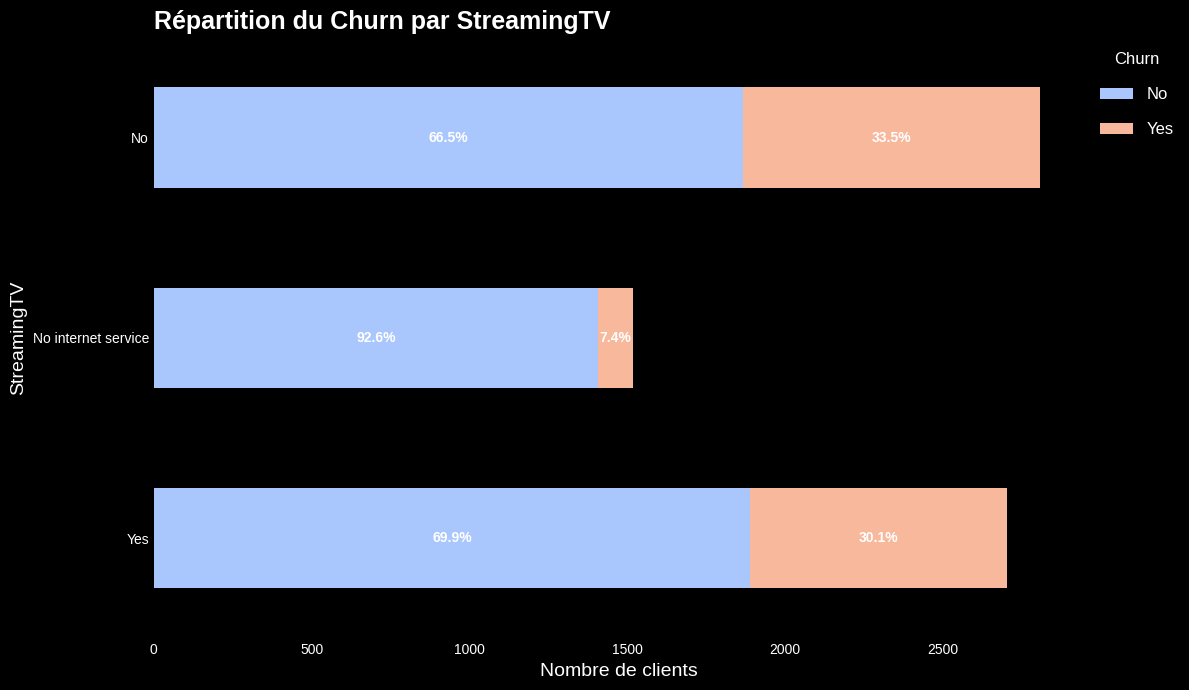

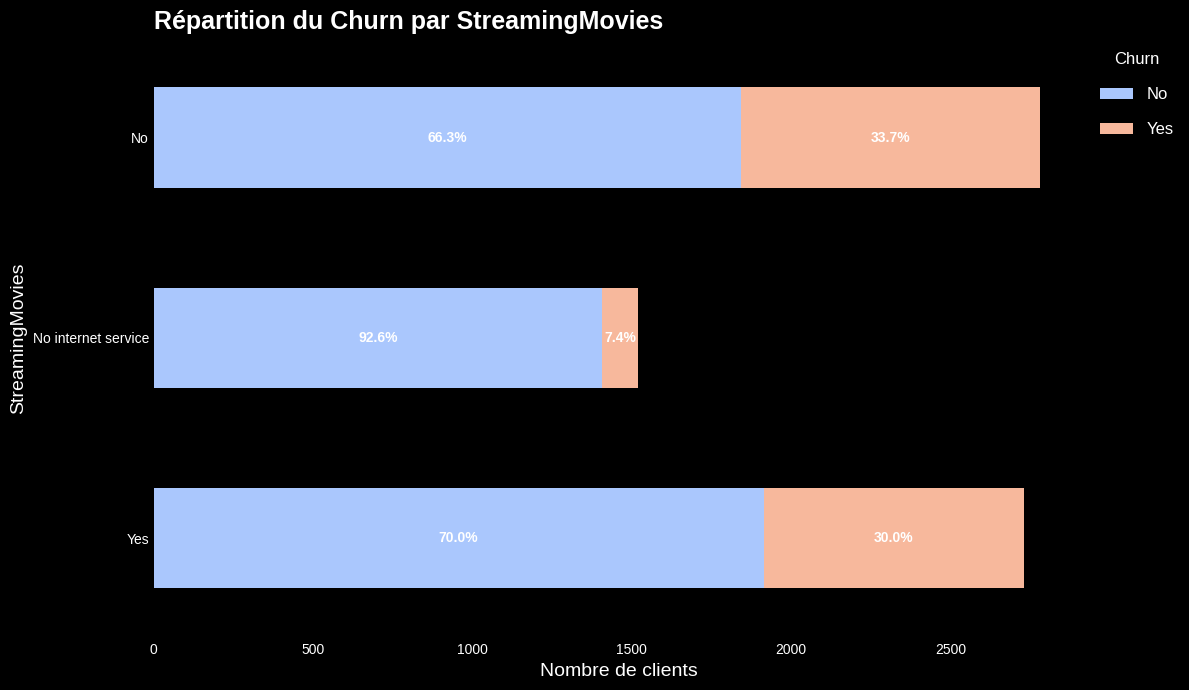

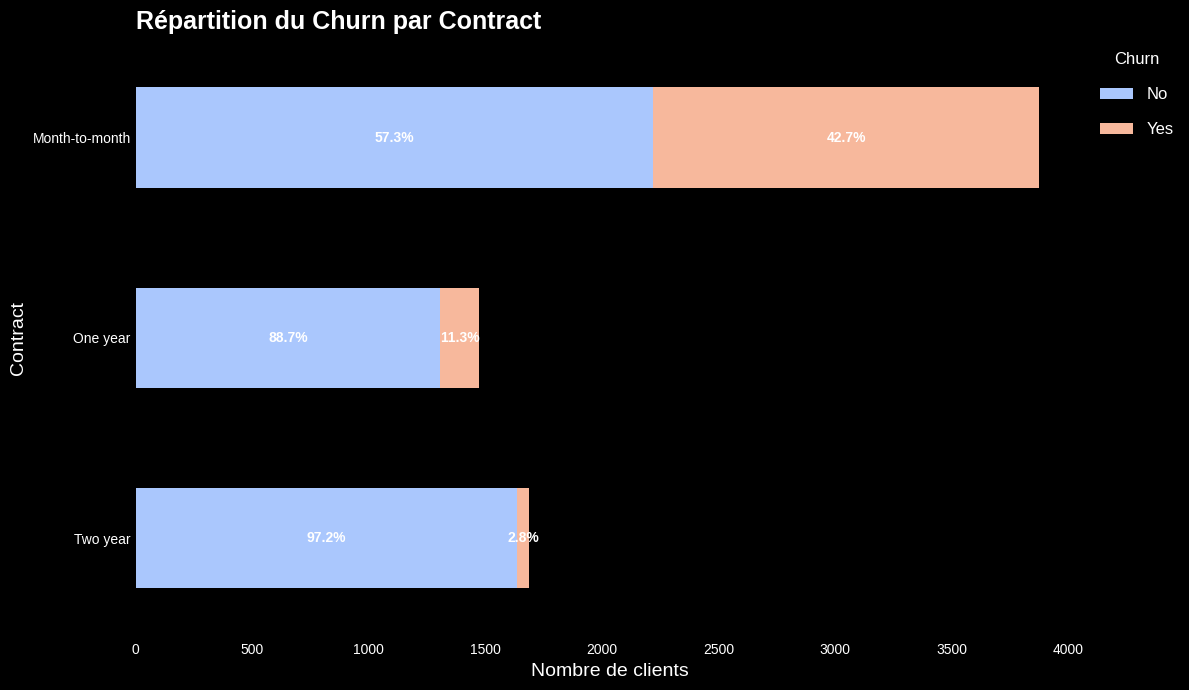

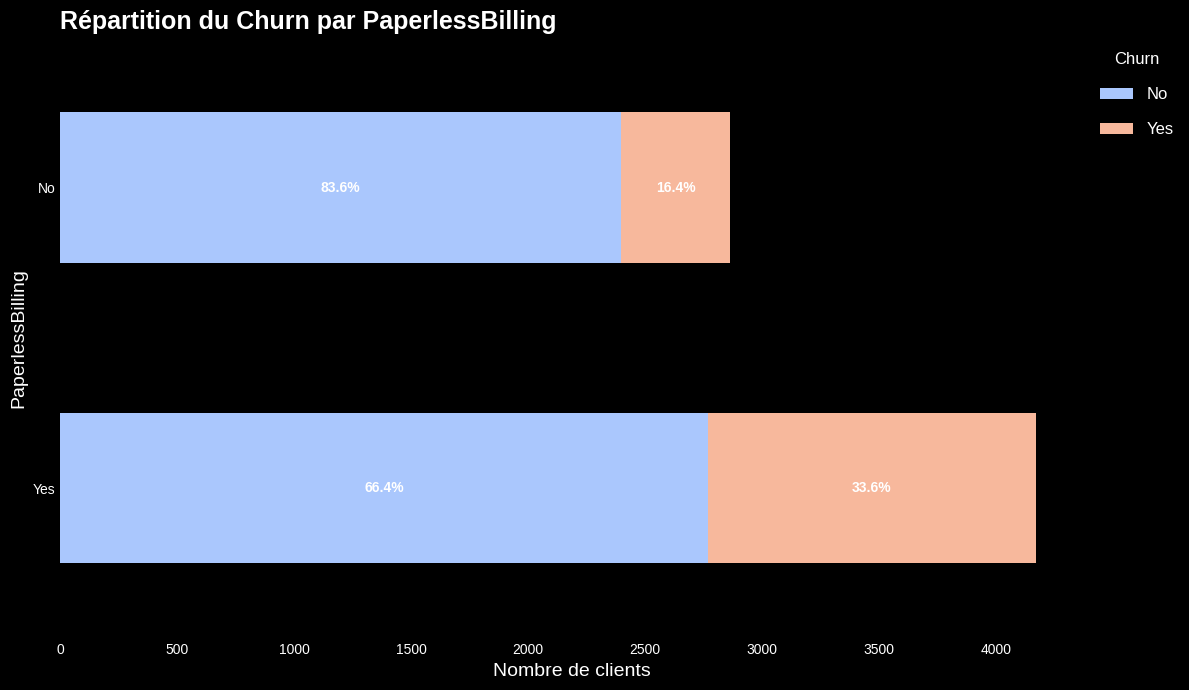

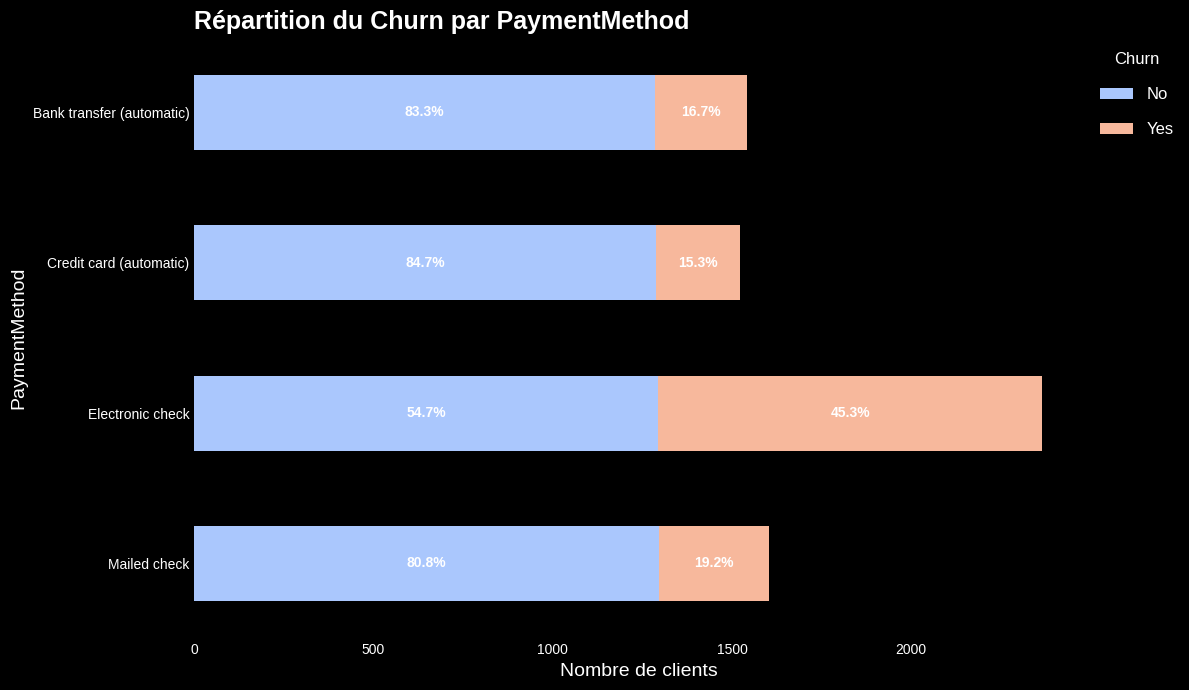

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_columns = df.select_dtypes(include='object').columns.drop(['Churn'], errors='ignore')

for col in cat_columns:
    counts = df.groupby([col, 'Churn']).size().unstack(fill_value=0)
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100

    fig, ax = plt.subplots(figsize=(12, 7))
    counts.plot(kind='barh', stacked=True, ax=ax,color = sns.color_palette("coolwarm", 2) ) #sns.color_palette("coolwarm", 2) color=["white","red"]

    # Ajouter annotations conditionnelles
    for i, category in enumerate(counts.index):
        for j, churn_status in enumerate(counts.columns):
            count = counts.loc[category, churn_status]
            pct = percentages.loc[category, churn_status]
            if count > 0:  # n'affiche pas les annotations pour barres nulles
                ax.text(x=sum(counts.iloc[i, :j]) + count/2, y=i,
                        s=f'{pct:.1f}%', va='center', ha='center',
                        fontsize=10, fontweight="bold", color='white', clip_on=False)

    ax.set_title(f'Répartition du Churn par {col}', fontsize=18, fontweight="bold", loc="left")
    ax.set_xlabel('Nombre de clients', fontsize=14)
    ax.set_ylabel(col, fontsize=14)

    ax.xaxis.grid(False)
    ax.yaxis.grid(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.legend(title="Churn", facecolor='white', edgecolor='pink', fontsize=12,title_fontsize=12, labelspacing=1.2, loc='upper left',bbox_to_anchor=(1, 1))

    ax.invert_yaxis()
    plt.tight_layout()
    plt.show()


Les graphiques à barres empilées ci-dessus montrent clairement comment le taux de résiliation (`Churn = Yes`) varie en fonction des différentes catégories de clients. L'observation des pourcentages et de la longueur des barres "Yes" par rapport aux barres "No" au sein de chaque catégorie nous permet d'identifier les segments de clientèle les plus à risque.

Voici les points clés à retenir de ces visualisations :

*   **gender (Genre) :** Il n'y a pas de différence significative dans le taux de churn entre les hommes et les femmes. Le genre seul n'est probablement pas un facteur déterminant de la résiliation.

*   **SeniorCitizen :** Les personnes âgées (`Yes`) ont un taux de churn nettement plus élevé que les non-personnes âgées (`No`). C'est un segment de clientèle plus à risque.

*   **Partner (Partenaire) et Dependents (Personnes à charge) :** Les clients qui n'ont **ni partenaire ni personnes à charge** (`Partner = No`, `Dependents = No`) montrent un taux de churn plus élevé que ceux qui en ont. Avoir un partenaire ou des personnes à charge semble associé à une plus grande fidélité.

*   **PhoneService (Service Téléphonique) :** Avoir un service téléphonique (`Yes`) ou non (`No`) ne semble pas avoir un impact majeur sur le taux de churn, la proportion de résiliation étant similaire dans les deux groupes.

*   **MultipleLines (Plusieurs Lignes) :** Parmi les clients ayant un service téléphonique, ceux qui ont **plusieurs lignes** (`Yes`) ont un taux de churn légèrement supérieur à ceux qui n'en ont qu'une (`No`). Les clients sans service téléphonique ont un taux de churn très faible (comme mentionné précédemment, ils ne sont pas des clients "actifs" au même titre).

*   **InternetService (Service Internet) :** C'est un facteur très important. Les clients avec un service **Fiber optic** ont un taux de churn **nettement plus élevé** (environ 41.9%) comparé à ceux avec DSL (environ 19.0%) ou pas de service internet du tout (environ 7.4%). Le service par fibre optique, bien que rapide, semble associé à une plus grande insatisfaction ou à d'autres facteurs de résiliation.

*   **OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport (Services additionnels Internet) :** Pour tous ces services, les clients qui **n'y ont pas souscrit** (`No`) montrent un taux de churn **nettement plus élevé** que ceux qui les ont (`Yes`). Parmi ceux qui ont un service internet, l'absence de **Online Security** et de **Tech Support** semble particulièrement augmenter le risque de résiliation. Cela souligne l'importance de ces services pour la fidélisation.

*   **StreamingTV et StreamingMovies (Streaming Internet) :** Les clients qui ont ces services de streaming (`Yes`) semblent avoir un taux de churn légèrement **plus faible** que ceux qui ne les ont pas (`No`). Ces services pourraient contribuer à la satisfaction et à la fidélisation.

*   **Contract (Contrat) :** C'est l'un des facteurs les **plus influents**. Les clients avec un contrat **Month-to-month** ont un taux de churn **extrêmement élevé** (environ 42.7%) comparé aux contrats d'un an (environ 11.3%) et de deux ans (environ 2.4%). Cela confirme que les contrats à long terme sont un puissant levier de fidélisation.

*   **PaperlessBilling (Facturation sans papier) :** Les clients qui ont opté pour la facturation sans papier (`Yes`) montrent un taux de churn légèrement **plus élevé** que ceux qui ne l'ont pas (`No`).

*   **PaymentMethod (Méthode de Paiement) :** La méthode de paiement **Electronic check** est associée à un taux de churn **beaucoup plus élevé** (environ 45.3%) comparé aux autres méthodes (Mailed check, Bank transfer, Credit card). Cela pourrait indiquer des problèmes avec ce mode de paiement ou être corrélé à d'autres facteurs de churn (par exemple, les clients Month-to-month ou Fiber optic qui utilisent souvent ce mode de paiement).

En résumé, l'analyse bivariée des variables catégorielles a mis en évidence que le type de **contrat (Month-to-month)**, le type de **service internet (Fiber optic)**, l'absence de services additionnels comme **Online Security** et **Tech Support**, et la **méthode de paiement Electronic check** sont les facteurs les plus fortement associés à un risque de résiliation élevé. Ces informations sont cruciales pour cibler les actions de rétention.

## Rélations entre les variables

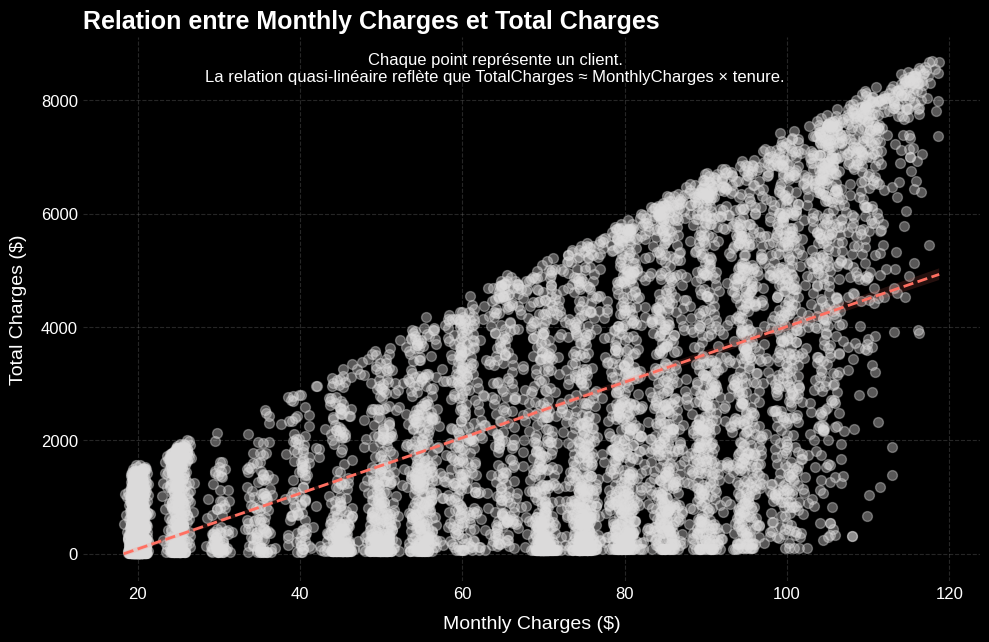

In [123]:
fig, ax = plt.subplots(figsize=(10, 7))

# Scatter + régression
sns.regplot(
    data=df,
    x="MonthlyCharges",
    y="TotalCharges",
    scatter_kws={"alpha":0.4, "s":50, "color":sns.color_palette("coolwarm", 5)[2]},  # taille & couleur points
    line_kws={"color":"#FF6F61", "lw":2, "ls":"--"},  # droite de régression stylisée
    ax=ax
)

# --- TITRES ---
ax.set_title("Relation entre Monthly Charges et Total Charges", fontsize=18, fontweight="bold" ,loc='left')

ax.set_xlabel("Monthly Charges ($)", fontsize=14, labelpad=10)
ax.set_ylabel("Total Charges ($)", fontsize=14, labelpad=10)

# --- PERSONNALISATION AXES ---
ax.tick_params(axis='both', labelsize=12, colors="white")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Ajouter une légère grille discrète
ax.grid(True, which='major', linestyle='--', alpha=0.3, color="gray")

# --- CONTEXTE / SOUS-TITRE ---
plt.suptitle(
    "Chaque point représente un client.\nLa relation quasi-linéaire reflète que TotalCharges ≈ MonthlyCharges × tenure.",
    fontsize=12, color="white",y=0.85
)

plt.tight_layout()
plt.show()


In [125]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,13 - 24
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,61 - 72
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,1 - 12
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1 - 12


In [ ]:
df["Churn"] = np.where(df["Churn"]=="Yes",1,0).astype(int)
# df["Churn"] # vérification


In [ ]:



df_dum = df.copy()
# pd.unique(df_dum[df_dum.select_dtypes(include='object').columns])
col_cat = df_dum[df_dum.select_dtypes(include='object').columns]
Liste = []
for val in col_cat:
  if len(pd.unique(col_cat[val])) <= 2:
    print(val,pd.unique(col_cat[val]))
    Liste.append(val) # Liste # vérification
    df_dum[Liste] = df_dum[Liste].replace({"Yes":1 , "No":0})



In [ ]:
 df_dum

In [ ]:
df_dum = pd.get_dummies(df_dum)
df_dum.replace({True:1,False:0}, inplace=True)
df_dum = df_dum.astype(int)
df_dum # verifications
# print("\nInfo sur df_dum après transformation :")
# df_dum.info() #verifications


In [ ]:
# Corrélations avec Churn
resume_corr = df_dum.corr()["Churn"].sort_values(ascending=False).drop("Churn")
seuil = 0.2

# Palette conditionnelle
colors = [
    "#FF4C4C" if val >= seuil else "#4DD2FF" if val <= -seuil else "#555555"
    for val in resume_corr.values
]

fig, ax = plt.subplots(figsize=(16,16))
sns.barplot(
    x=resume_corr.values,
    y=resume_corr.index,
    ax=ax,
    palette=colors
)

# Titres et labels
ax.set_title("Corrélation avec Churn", fontsize=20, fontweight="bold", loc="left", pad=23, color="white")
ax.set_xlabel("Coefficient de corrélation", fontsize=16, color="white", labelpad=20)
ax.set_ylabel(" ")  # labels Y déjà explicites
ax.tick_params(axis='x', labelsize=14, colors="white")
ax.tick_params(axis='y', labelsize=14, colors="white")

# Grille
ax.xaxis.grid(True, linestyle="--", alpha=0.3, color="white")
ax.yaxis.grid(False)

# Storytelling : annotations pour les corrélations importantes
for i, val in enumerate(resume_corr.values):
    if abs(val) >= seuil:
        ax.text(val + 0.01 if val > 0 else val - 0.03, i, f"{val:.2f}", color="white", fontsize=12, fontweight="bold", va="center")

# Texte explicatif (en utilisant des objets texte séparés pour la couleur)
text_x = 0 # Position x de départ du texte explicatif
text_y = -3 # Position y de départ du texte explicatif

# Texte pour la ligne 1
ax.text(text_x, text_y, r"$\bf{En\ rouge}$", fontsize=14, color="#FF4C4C", ha="left", va="top")
ax.text(text_x + 0.078, text_y, ": variables fortement corrélées positivement avec le churn", fontsize=14, color="white", ha="left", va="top")

# Texte pour la ligne 2
ax.text(text_x, text_y + 0.8, r"$\bf{En\ bleu}$", fontsize=14, color="#4DD2FF", ha="left", va="top")
ax.text(text_x +  0.078, text_y + 0.8, ": variables fortement corrélées négativement avec le churn", fontsize=14, color="white", ha="left", va="top")

# Texte pour la ligne 3
ax.text(text_x, text_y + 1.6, r"$\bf{En\ gris}$", fontsize=14, color="#555555", ha="left", va="top")
ax.text(text_x +  0.078, text_y + 1.6, f": corrélations faibles (-{seuil} <= corrélation <= {seuil})", fontsize=14, color="white", ha="left", va="top")


plt.tight_layout()
plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(16, 12))

# Heatmap
sns.heatmap(
    df_dum.corr(),
    annot=False,
    cmap="viridis",       # palette de couleur
    linewidths=0.8,
    ax=ax,
    cbar_kws={"shrink": .8, "aspect": 20, "label": "Corrélation"}
)

#  Customisation
ax.set_title(
    "Matrice de corrélation",
    fontsize=22,
    fontweight="bold",
    loc="left",
    pad=20,
    color="white"
)

# Couleur des ticks
ax.tick_params(axis='both', labelsize=13, colors="white")

# Fond noir sur axes et figure
ax.set_facecolor("#1a1a1a")        # fond de la zone des données
fig.patch.set_facecolor("#1a1a1a") # fond global

# Couleur de la barre de couleur
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12, colors="white")
cbar.set_label("Corrélation", fontsize=14, color="white")

plt.tight_layout()
plt.show()


In [ ]:

# Calcul matrice de corrélation
corr = df_dum.corr()

# Masquer corrélations faibles
seuil = 0.65
mask = corr.abs() < seuil
corr_masked = corr.mask(mask, other=np.nan)

fig, ax = plt.subplots(figsize=(14, 10))

# Heatmap corrélations fortes (Rouge → GitHub accent)
sns.heatmap(
    corr_masked,
    annot=False,
    cmap="Reds",
    linewidths=0.6,
    linecolor="#2d333b",
    ax=ax,
    cbar_kws={"shrink": .8, "aspect": 20, "label": f"Corrélation (|ρ| > {seuil})"}
)

# Heatmap corrélations faibles (gris neutre)
sns.heatmap(
    corr.where(mask),
    cmap="Greys",
    annot=False,
    cbar=False,
    linewidths=0.6,
    linecolor="#2d333b",
    ax=ax
)

# Titre principal
ax.set_title(
    "Matrice de corrélation",
    fontsize=20, fontweight="bold", loc="left", color="#c9d1d9", pad=20, family="monospace"
)

# Sous-titre
plt.suptitle(
    f"Les corrélations les plus concentrées en valeurs absolues (> {seuil})",
    y=0.92, fontsize=12, color="#8b949e", fontfamily="monospace", fontweight="medium"
)

# Customisation ticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=11,
                   color="#c9d1d9", fontfamily="monospace", fontweight="medium")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=11,
                   color="#c9d1d9", fontfamily="monospace", fontweight="medium")

# Fond GitHub dark
ax.set_facecolor("#0d1117")
fig.patch.set_facecolor("#0d1117")

#Colorbar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=11, colors="#c9d1d9")
cbar.set_label(f"Corrélation (|ρ| > {seuil})", fontsize=13, color="#c9d1d9", family="monospace")

plt.tight_layout()
plt.show()


Intéressons au variables a forte corrélation (>= 0.65)

* La charge total (Totalcharges) est fortement corrélé positivement avec tenure (ancienneté) et MonthlyCharges (charges mensuelles). Ce résultat est attendu, puisque les frais totaux s’accumulent avec le temps et dépendent directement des mensualités.

* La charge mensuelle est fortement corrélé avec la possession d'une fibre optic par contre il existe une forte corrélation négative entre la charge mensuelles et OnlineBackup_No internet serve
De vice protection no internet
TechSupoort Nointernet service
Streaming tu no internet service
Streaming mobile no internet service

Ont note qu’il existe une relation negative entre ses variable avec la charge mensuelle





In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Calcul matrice de corrélation
corr = df_dum.corr()

# Seuil pour mettre en évidence les corrélations
seuil = 0.65

# Masque pour corrélations faibles
corr_masked = corr.copy()
corr_masked[corr_masked.abs() < seuil] = 0  # faibles corrélations grisées

# Création d'une palette personnalisée
colorscale = [
    [0, '#4d4d4d'],       # gris pour corr < seuil
    [0.001, '#ff4d4d'],   # rouge clair
    [0.5, '#ff0000'],     # rouge moyen
    [1, '#800000']        # rouge foncé
]

fig = go.Figure(
    data=go.Heatmap(
        z=corr_masked.values,
        x=corr_masked.columns,
        y=corr_masked.columns,
        colorscale='Reds',
        zmin=-1,
        zmax=1,
        colorbar=dict(title=f"Corrélation (|ρ| > {seuil})", tickfont=dict(color='white'), titlefont=dict(color='white')),
        hovertemplate='Variable 1: %{y}<br>Variable 2: %{x}<br>Corrélation: %{z:.2f}<extra></extra>'
    )
)

# Customisation layout style GitHub dark
fig.update_layout(
    title={
        'text': "Matrice de corrélation",
        'x':0.01,
        'xanchor': 'left',
        'font': dict(size=20, color='white', family='monospace')
    },
    xaxis=dict(tickangle=45, tickfont=dict(color='white', family='monospace')),
    yaxis=dict(tickfont=dict(color='white', family='monospace')),
    plot_bgcolor="#0d1117",
    paper_bgcolor="#0d1117",
    width=900,
    height=800
)

# Affichage
fig.show()
